# WICHTIG Ab hier beginnt die ANALYSE!!! 

# Whole Transkriptom plotts ORIGINAL DATA LOADED

In [2]:
from pylab import *
from numpy import outer
rc('text', usetex=False)
a=outer(arange(0,1,0.01),ones(10))
figure(figsize=(15,5))
subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[m for m in cm.datad if not m.endswith("_r")]
maps.sort()
l=len(maps)+1
for i, m in enumerate(maps):
    subplot(1,l,i+1)
    axis("off")
    imshow(a,aspect='auto',cmap=get_cmap(m),origin="lower")
    title(m,rotation=90,fontsize=20)
savefig("colormaps.png",dpi=100,facecolor='gray')

/usr/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20 colormap was deprecated in version 2.0. Use tab20 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20b colormap was deprecated in version 2.0. Use tab20b instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega20c colormap was deprecated in version 2.0. Use tab20c instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in v

In [3]:
%matplotlib inline
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.mlab import bivariate_normal
import numpy as np
import scipy
#import pylab

In [4]:
import pandas as pd
CGNP_CGNfull = pd.read_excel('/home/patrick/Syncthing/Work/Galaxy20150915/CGNPvsCGN/CGNPvsCGN-Microarray/CGNP_CGN/CGNP_CGN.xlsx', 'CGNP_CGN')
CGNPfull = pd.read_excel('/home/patrick/Syncthing/Work/Galaxy20150915/CGNPvsCGN/CGNPvsCGN-Microarray/CGNP/results_Bovio_2015.xlsx', 'results_Bovio_2015') #delimiter='\t')#, index_col=0)#, row_labels=0)
CGNfull = pd.read_excel('/home/patrick/Syncthing/Work/Galaxy20150915/CGNPvsCGN/CGNPvsCGN-Microarray/CGN/CGN-Dot1l-Inh-ANOVAResults_20151113-for_bam.xlsx', 'ANOVAResults') #delimiter='\t')#, index_col=0)#, row_labels=0)
Atoh1full = pd.read_excel('/home/patrick/Syncthing/Work/Galaxy20150915/Atoh1CreVsWT_P3-Microarray/Atoh1CreVsWT.xlsx', 'Atoh1CreVsWt') #delimiter='\t')#, index_col=0)#, row_labels=0)

In [5]:
len(CGNP_CGNfull)

41345

In [6]:
pd.set_option('display.height', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 50)

height has been deprecated.



In [7]:
CGNP_CGNsortp = CGNP_CGNfull.sort_values(by= 'pvalueTreatmentVsControl', ascending=True, kind='quicksort')
CGNPsortp = CGNPfull.sort_values(by= 'pvalueTreatmentVsControl',  ascending=True, kind='quicksort')
CGNsortp = CGNfull.sort_values(by= 'pvalueTreatmentVsControl', ascending=True, kind='quicksort')
Atoh1sortp = Atoh1full.sort_values(by= 'pvalueTreatmentVsControl', ascending=True, kind='quicksort')

print(len(CGNP_CGNsortp), len(CGNPsortp), len(CGNsortp), len(Atoh1sortp))

41345 34472 34472 34472


In [8]:
pValueCutOff = 'pvalueTreatmentVsControl <= 0.05'

PrmdupCGNP_CGN = CGNP_CGNsortp.query(pValueCutOff).drop_duplicates(subset='Gene_Symbol')
PrmdupCGNP = CGNPsortp.query(pValueCutOff).drop_duplicates(subset='Gene_Symbol')
PrmdupCGN = CGNsortp.query(pValueCutOff).drop_duplicates(subset='Gene_Symbol')
PrmdupAtoh = Atoh1sortp.query(pValueCutOff).drop_duplicates(subset='Gene_Symbol')
print(len(PrmdupCGNP_CGN), len(PrmdupCGNP), len(PrmdupCGN), len(PrmdupAtoh))
#print(PrmdupCGNP_CGN.head(1), PrmdupCGNP.head(1), PrmdupCGN.head(1), PrmdupAtoh.head(1))

9148 1441 1864 2237


In [9]:
CGNP_CGNsortpFC = PrmdupCGNP_CGN.sort_values(by= 'FoldChangeTreatmentVsControl', ascending=False, kind='quicksort')
CGNPsortpFC = PrmdupCGNP.sort_values(by= 'FoldChangeTreatmentVsControl', ascending=False, kind='quicksort')
CGNsortpFC = PrmdupCGN.sort_values(by= 'FoldChangeTreatmentVsControl', ascending=False, kind='quicksort')
Atoh1sortpFC = PrmdupAtoh.sort_values(by= 'FoldChangeTreatmentVsControl', ascending=False, kind='quicksort')
print(len(CGNP_CGNsortpFC), len(CGNPsortpFC), len(CGNsortpFC), len(Atoh1sortpFC))

9148 1441 1864 2237


In [10]:
FCcutoff = 'FoldChangeTreatmentVsControl >= 0|FoldChangeTreatmentVsControl <= -0'

#FCcutoff2 = 'FoldChangeTreatmentVsControl >= -1.5'
PrmdupfcCGNP_CGN = CGNP_CGNsortpFC.query(FCcutoff)#.query(FCcutoff2)
PrmdupfcCGNP = CGNPsortpFC.query(FCcutoff)#.query(FCcutoff2)
PrmdupfcCGN = CGNsortpFC.query(FCcutoff)#.query(FCcutoff2)
PrmdupfcAtoh = Atoh1sortpFC.query(FCcutoff)#.query(FCcutoff2)
print(len(PrmdupfcCGNP_CGN), len(PrmdupfcCGNP), len(PrmdupfcCGN), len(PrmdupfcAtoh))
#print(PrmdupCGNP_CGN.head(1), PrmdupCGNP.head(1), PrmdupCGN.head(1), PrmdupAtoh.head(1))

9148 1441 1864 2237


9147 1440 1863 2236

4909 66 296 193

+1,5FC 2918 20 208 83

-1,5FC 1992 46 89 110

In [11]:
bed = 'seqname','start','stop','Gene_Symbol','Average','strand','pvalueTreatmentVsControl','n1','n2','n3','FoldChangeTreatmentVsControl','RefSeq'
plotme = 'Gene_Symbol','n1','n2','n3', 'Average','pvalueTreatmentVsControl','FoldChangeTreatmentVsControl'
GO = 'Gene_Symbol',

CGNP_CGNplotme = PrmdupfcCGNP_CGN.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,plotme].set_index('Gene_Symbol')
CGNPplotme = PrmdupfcCGNP.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,plotme].set_index('Gene_Symbol')
CGNplotme = PrmdupfcCGN.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,plotme].set_index('Gene_Symbol')
Atoh1plotme = PrmdupfcAtoh.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,plotme].set_index('Gene_Symbol')

CGNP_CGN_beds = PrmdupfcCGNP_CGN.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,bed].set_index('seqname')
CGNP_beds = PrmdupfcCGNP.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,bed].set_index('seqname')
CGN_beds = PrmdupfcCGN.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,bed].set_index('seqname')
Atoh1_beds = PrmdupfcAtoh.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,bed].set_index('seqname')

CGNP_CGN_GOs = PrmdupfcCGNP_CGN.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,GO].set_index('Gene_Symbol')
CGNP_GOs = PrmdupfcCGNP.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,GO].set_index('Gene_Symbol')
CGN_GOs = PrmdupfcCGN.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,GO].set_index('Gene_Symbol')
Atoh1_GOs = PrmdupfcAtoh.sort_values(by= 'Average', ascending=False, kind='quicksort').loc[:,GO].set_index('Gene_Symbol')


print(len(CGNP_CGNplotme), len(CGNPplotme), len(CGNplotme), len(Atoh1plotme))
#print(CGNP_CGNplot.head(1), CGNPplot.head(1), CGNplot.head(1), Atoh1plot.head(1))

9148 1441 1864 2237


In [12]:
#import re

#infile = CGNP_CGN_beds

#with open(infile, "r") as f:
#    for line in f.readlines():
#        line = line.strip()
#        if line.startswith("chr"):
#            if len(re.split("[\t ]", line))==11:
#                print(line)

In [13]:
#!cat input.bed | awk '{if (NF!=11) print $0}'

In [14]:
#cat input.bed | awk '{if (NF==11) print $0}' > good.bed

In [15]:
#interval_to_bed_converter 'infile.interval' 'outfile.bed' 1 2 3 6 4

In [16]:
#Drop lines with NaN containing, to remove non anotated regions
CGNP_CGNplot = CGNP_CGNplotme.drop(NaN)
CGNPplot = CGNPplotme.drop(NaN)#
CGNplot = CGNplotme.drop(NaN)
Atoh1plot = Atoh1plotme.drop(NaN)#

CGNP_CGN_bed = CGNP_CGN_beds#.drop(NaN) 
CGNP_bed = CGNP_beds#.drop(NaN)#
CGN_bed = CGN_beds#.drop(NaN) 
Atoh1_bed = Atoh1_beds#.drop(NaN)#

CGNP_CGN_GO = CGNP_CGN_GOs.drop(NaN) 
CGNP_GO = CGNP_GOs.drop(NaN)#
CGN_GO = CGN_GOs.drop(NaN) 
Atoh1_GO = Atoh1_GOs.drop(NaN)#

print(len(CGNP_CGNplot), len(CGNPplot), len(CGNplot), len(Atoh1plot))
#print(CGNP_CGNplot.head(1), CGNPplot.head(1), CGNplot.head(1), Atoh1plot.head(1)),

9147 1440 1863 2236


In [17]:
# output txt files

#CGNP_CGNplot.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_CGNplot.txt','\t')
#CGNPplot.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNPplot.txt','\t')
#CGNplot.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNplot.txt','\t')
#Atoh1plot.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/Atoh1plot.txt','\t')

#CGNP_CGN_bed.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/DE_CGNP-CGN.bed','\t')
#CGNP_bed.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/DE_CGNP.bed','\t')
#CGN_bed.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/DE_CGN.bed','\t')
#Atoh1_bed.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/DE_Atoh1.bed','\t')

#CGNP_CGN_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_CGN_GO.txt','\t')
#CGNP_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_GO.txt','\t')
#CGN_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGN_GO.txt','\t')
#Atoh1_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/Atoh1_GO.txt','\t')

#CGNP_CGN_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_CGN_GO+1,5FC.txt','\t')
#CGNP_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_GO+1,5FC.txt','\t')
#CGN_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGN_GO+1,5FC.txt','\t')
#Atoh1_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/Atoh1_GO+1,5FC.txt','\t')

#CGNP_CGN_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_CGN_GO-1,5FC.txt','\t')
#CGNP_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_GO-1,5FC.txt','\t')
#CGN_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGN_GO-1,5FC.txt','\t')
#Atoh1_GO.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/Atoh1_GO-1,5FC.txt','\t')

In [18]:
CGNP_CGN_bed.head(3).append(CGNP_CGN_bed.tail(3))

,start,stop,Gene_Symbol,Average,strand,pvalueTreatmentVsControl,n1,n2,n3,FoldChangeTreatmentVsControl,RefSeq
seqname,,,,,,,,,,,
chr3,19957054,20009145,Cp,5.261080,+,0.000011,5.50218,5.09918,5.18188,38.3484,NM_001276248
chr7,46711998,46715676,Saa3,5.229590,-,0.000043,5.48483,5.44604,4.75790,37.5200,NM_011315
chr16,31296192,31314808,Apod,4.164750,-,0.004128,4.78290,5.19496,2.51639,17.9354,NM_001301353
chr1,173857220,173880187,Mndal,-3.691600,-,0.000985,-4.01915,-3.47399,-3.58166,-12.9206,NM_001170853
chr4,133101143,133101555,Gm42035,-4.712193,+,0.000699,-3.35747,-5.30051,-5.47860,-26.2127,XM_011248564
chr8,90886284,90886709,Gm3579,-4.712193,+,0.000699,-3.35747,-5.30051,-5.47860,-26.2127,XR_881473


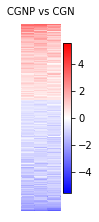

4909
5.54761


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Gene_Symbol,,,,,,
Cp,5.50218,5.09918,5.18188,5.261080,0.000011,38.3484
Saa3,5.48483,5.44604,4.75790,5.229590,0.000043,37.5200
Apod,4.78290,5.19496,2.51639,4.164750,0.004128,17.9354
Mmp13,3.75072,4.53617,4.15321,4.146700,0.000015,17.7125
Mmp3,4.05884,4.08120,4.08163,4.073890,0.000004,16.8408
Gm12891,-3.26601,-3.07096,-4.22086,-3.519277,0.000299,-11.4659
Cks2,-3.28223,-3.36984,-3.96387,-3.538647,0.000163,-11.6209
Mndal,-4.01915,-3.47399,-3.58166,-3.691600,0.000985,-12.9206
Gm42035,-3.35747,-5.30051,-5.47860,-4.712193,0.000699,-26.2127


In [19]:
import pandas as pd

heatmappme = CGNP_CGNplot.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5')

column_labels = ''#heatmappme.index #CGNP.axes[0]
row_labels = ['', 'CGNP vs CGN', ''] #CGNP.axes[1]
data = heatmappme.values[:,0:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/6
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(0.895, 3.445))
#fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

plt.show()

print(len(heatmappme))
print(maxval)
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/run/media/patrick/Lexar/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/Bovio_et_al/Raw/DE_CGNP-CGN.svg")

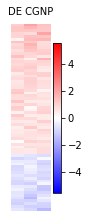

66
5.54761


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Gene_Symbol,,,,,,
Gm22935,1.06826,2.00825,1.33708,1.471197,0.002509,2.77252
Scd1,1.25100,1.58458,1.25622,1.363933,0.000076,2.57386
Pank1,1.21611,1.24537,1.18371,1.215063,0.000217,2.32151
Snrpe,0.92237,0.75874,1.95383,1.211647,0.013118,2.31602
Gm12744,0.93410,1.30718,1.26948,1.170253,0.000765,2.25051
Rex2,-0.67167,-1.48693,-0.28574,-0.814780,0.040348,-1.75903
Gm26715,-0.94934,-0.98004,-0.52461,-0.817997,0.004121,-1.76295
Gm10944,-1.00333,-0.72656,-0.94616,-0.892017,0.007891,-1.85577
Gm25227,-0.73240,-1.03409,-0.99149,-0.919327,0.014507,-1.89124


In [20]:
import pandas as pd

heatmappme = CGNPplot.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5')

column_labels = ''#heatmappme.index #CGNP.axes[0]
row_labels = ['','DE CGNP',''] #CGNP.axes[1]
data = heatmappme.values[:,0:3] #square(heatmappme.values) for FC instead of log2FC

#maxval =  max([abs(data.min()), data.max()])
height= len(column_labels)/6
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(0.895, 3.445))
#fig, ax = plt.subplots(figsize=(1.5, 5.586))#inch
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label = '')#, ax=ax) #log2FCcut

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
    
plt.show()
print(len(heatmappme))
print(maxval)
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/run/media/patrick/Lexar/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/Bovio_et_al/Raw/DE_CGNP.svg")

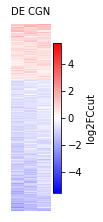

296
5.54761


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Gene_Symbol,,,,,,
Fdps,1.15792,2.01948,1.40660,1.528000,0.010464,2.88386
Scd1,1.25041,1.37290,1.85196,1.491757,0.016623,2.81231
Ucma,1.31853,1.66895,1.45393,1.480470,0.002194,2.79040
Mvd,1.33438,1.54997,1.04250,1.308950,0.010384,2.47761
Mvk,0.58636,1.70286,1.48925,1.259490,0.007212,2.39411
Gm3002,-1.58873,-1.54765,-1.35289,-1.496423,0.003011,-2.82142
Gm3500,-1.41717,-1.66888,-1.42004,-1.502030,0.001768,-2.83243
Gm3696,-1.59505,-1.50580,-1.51331,-1.538053,0.001880,-2.90403
Hpgd,-2.01895,-1.51313,-1.30286,-1.611647,0.002480,-3.05601


In [21]:
import pandas as pd

heatmappme = CGNplot.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5')

column_labels = ''#heatmappme.index #CGNP.axes[0]
row_labels = ['','DE CGN',''] #CGNP.axes[1]
data = heatmappme.values[:,0:3] #square(heatmappme.values) for FC instead of log2FC

#maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/6
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(0.895, 3.445))
#fig, ax = plt.subplots(figsize=(1.5, 5.586))#inch
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label = 'log2FCcut')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
    
plt.show()
print(len(heatmappme))
print(maxval)
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/run/media/patrick/Lexar/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/Bovio_et_al/Raw/DE_CGN.svg")

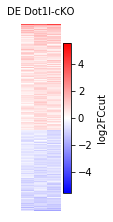

193
5.54761


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Gene_Symbol,,,,,,
Actc1,3.82258,3.46716,4.18244,3.824060,0.000033,14.16300
Tmem8c,2.05178,1.60532,1.92578,1.860960,0.001634,3.63250
Cyp4f39,1.44550,1.61090,1.57062,1.542340,0.000365,2.91267
Cartpt,1.72599,1.28319,1.04999,1.353057,0.037379,2.55453
Myl1,1.35147,0.90150,1.60546,1.286143,0.002173,2.43876
Baz1a,-0.70989,-1.29184,-1.14115,-1.047627,0.003673,-2.06713
Sgol1,-1.53482,-0.71978,-0.97874,-1.077780,0.011414,-2.11079
Arhgap19,-0.63297,-1.12623,-1.55337,-1.104190,0.010006,-2.14978
Ptcd2,-1.12826,-1.14980,-1.13874,-1.138933,0.001093,-2.20218


In [22]:
import pandas as pd

heatmappme = Atoh1plot.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5')

column_labels = ''#heatmappme.index #CGNP.axes[0]
row_labels = ['', 'DE Dot1l-cKO', ''] #CGNP.axes[1]
data = heatmappme.values[:,0:3] #square(heatmappme.values) for FC instead of log2FC

#maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/6
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(0.895, 3.445))
#fig, ax = plt.subplots(figsize=(.5, height))
#fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label = 'log2FCcut')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
    
plt.show()
print(len(heatmappme))
print(maxval)
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/run/media/patrick/Lexar/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/Bovio_et_al/Raw/DE_Atoh1.svg")
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/DE/Atoh1p0,05_log2FC-3n-names.svg")

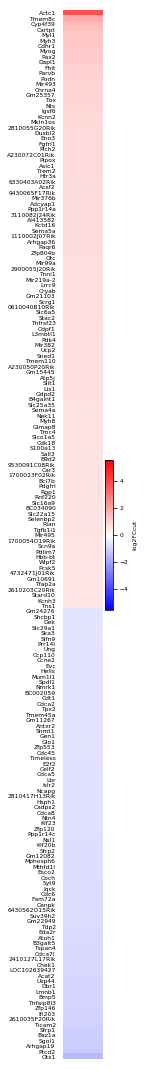

193
5.54761


In [39]:
import pandas as pd

heatmappme = Atoh1plot.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5')

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['', 'DE Dot1l-cKO', ''] #CGNP.axes[1]
data = heatmappme.values[:,3:4] #square(heatmappme.values) for FC instead of log2FC

#maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/10
width= len(row_labels)+1.2

#fig, ax = plt.subplots(figsize=(0.895, 3.445))
fig, ax = plt.subplots(figsize=(0.895, height))
#fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label = 'log2FCcut')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 8}
matplotlib.rc('font', **font)
    
plt.show()
print(len(heatmappme))
print(maxval)
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/run/media/patrick/Lexar/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/Bovio_et_al/Raw/DE_Atoh1.svg")
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/DE/Atoh1p0,05_log2FC-3n-names.svg")
fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/Bovio_et_al/Figures/Atoh1p0,05_log2FC-FC1,5-3n-names.svg")

# VENNY2.0 # 14 common elements in "CGNP p<=0.05", "CGN p<=0.05" and "Dot1l cKO p<=0.":
Lss
Insig1
Scd2
Fgfrl1
Lbr
Pdgfrb
Usp1
Nckipsd
Fnbp1l
Rnf139
Actr3
1200014J11Rik
Ppp2r1b
Gm5797


In [22]:
df= pd.DataFrame(CGNPplot)
df1= pd.DataFrame(CGNplot)
df2= pd.DataFrame(Atoh1plot)

frames = [df, df1, df2]
result = pd.concat(frames)
print(len(result) == len(CGNPplot)+len(CGNplot)+len(Atoh1plot))
sum(len(CGNPplot)+len(CGNplot)+len(Atoh1plot))

True


5539

In [23]:
CGNPvsCGN = pd.merge(df, df1, left_index=True, right_index=True, how='inner', suffixes=('_CGNP', '_CGN'))
print(len(CGNPvsCGN)),
CGNPvsCGN.head(2).append(CGNPvsCGN.tail(2))

111


,n1_CGNP,n2_CGNP,n3_CGNP,Average_CGNP,pvalueTreatmentVsControl_CGNP,FoldChangeTreatmentVsControl_CGNP,n1_CGN,n2_CGN,n3_CGN,Average_CGN,pvalueTreatmentVsControl_CGN,FoldChangeTreatmentVsControl_CGN
Gene_Symbol,,,,,,,,,,,,
Scd1,1.25100,1.58458,1.25622,1.363933,0.000076,2.57386,1.25041,1.37290,1.85196,1.491757,0.016623,2.81231
Lss,1.10688,0.94721,0.46834,0.840810,0.009885,1.79106,1.35127,1.12013,1.18003,1.217143,0.008662,2.32487
Slc1a2,-0.49822,-0.37729,-0.55786,-0.477790,0.007264,-1.39261,-0.76722,-1.18884,-1.03975,-0.998603,0.003996,-1.99807
Pcsk1,-0.37252,-0.49158,-0.87767,-0.580590,0.011062,-1.49546,-1.44551,-1.09384,-1.14980,-1.229717,0.001006,-2.34521


In [24]:
CGNvsAtoh1 = pd.merge(df1, df2, left_index=True, right_index=True, how='inner', suffixes=('_CGN', '_cKO'))
print(len(CGNvsAtoh1)),
CGNvsAtoh1.head(2).append(CGNvsAtoh1.tail(2))

180


,n1_CGN,n2_CGN,n3_CGN,Average_CGN,pvalueTreatmentVsControl_CGN,FoldChangeTreatmentVsControl_CGN,n1_cKO,n2_cKO,n3_cKO,Average_cKO,pvalueTreatmentVsControl_cKO,FoldChangeTreatmentVsControl_cKO
Gene_Symbol,,,,,,,,,,,,
Lss,1.35127,1.12013,1.18003,1.217143,0.008662,2.32487,-0.26863,-0.15091,-0.41483,-0.278123,0.031720,-1.21262
Insig1,0.91240,0.90670,0.92640,0.915167,0.018861,1.88577,-0.16880,-0.19890,-0.22490,-0.197533,0.025065,-1.14678
Kif18a,-1.46942,-1.29681,-1.27068,-1.345637,0.001169,-2.54142,-0.16527,-0.68636,-0.51067,-0.454100,0.040303,-1.36993
Gm3696,-1.59505,-1.50580,-1.51331,-1.538053,0.001880,-2.90403,0.16715,0.33236,0.23753,0.245680,0.009568,1.18565


In [25]:
CGNPvsAtoh1 = pd.merge(df, df2, left_index=True, right_index=True, how='inner', suffixes=('_CGNP', '_cKO'))
print(len(CGNPvsAtoh1)),
CGNPvsAtoh1.head(2).append(CGNPvsAtoh1.tail(2))

119


,n1_CGNP,n2_CGNP,n3_CGNP,Average_CGNP,pvalueTreatmentVsControl_CGNP,FoldChangeTreatmentVsControl_CGNP,n1_cKO,n2_cKO,n3_cKO,Average_cKO,pvalueTreatmentVsControl_cKO,FoldChangeTreatmentVsControl_cKO
Gene_Symbol,,,,,,,,,,,,
Pcyt1b,1.33787,1.18196,0.73533,1.085053,0.002084,2.12146,-0.66151,-0.33611,-0.29998,-0.432533,0.040279,-1.34960
Gm14493,0.96318,1.41850,0.79050,1.057393,0.011082,2.08117,0.38952,0.58436,0.19849,0.390790,0.025447,1.31111
Slc22a15,-0.70095,-0.47052,-0.86329,-0.678253,0.001610,-1.60020,0.66110,0.84383,0.32497,0.609967,0.021908,1.52622
Dusp10,-0.53694,-0.84502,-1.49653,-0.959497,0.028528,-1.94463,-0.75438,-0.24765,-0.72154,-0.574523,0.035809,-1.48918


In [26]:
CGNPvsCGNvsAtoh1 = pd.merge(CGNPvsCGN, df2, left_index=True, right_index=True, how='inner')
CGNPvsCGNvsAtoh1 = pd.DataFrame(CGNPvsCGNvsAtoh1)
 
print(len(CGNPvsCGNvsAtoh1)),
CGNPvsCGNvsAtoh1.head(2).append(CGNPvsCGNvsAtoh1.tail(2))

15


,n1_CGNP,n2_CGNP,n3_CGNP,Average_CGNP,pvalueTreatmentVsControl_CGNP,FoldChangeTreatmentVsControl_CGNP,n1_CGN,n2_CGN,n3_CGN,Average_CGN,pvalueTreatmentVsControl_CGN,FoldChangeTreatmentVsControl_CGN,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Gene_Symbol,,,,,,,,,,,,,,,,,,
Lss,1.10688,0.94721,0.46834,0.840810,0.009885,1.79106,1.35127,1.12013,1.18003,1.217143,0.008662,2.32487,-0.26863,-0.15091,-0.41483,-0.278123,0.031720,-1.21262
Insig1,0.77000,0.88740,0.58130,0.746233,0.000821,1.67743,0.91240,0.90670,0.92640,0.915167,0.018861,1.88577,-0.16880,-0.19890,-0.22490,-0.197533,0.025065,-1.14678
Ppp2r1b,-0.38206,-0.10169,-0.30264,-0.262130,0.021752,-1.19924,-0.34254,-0.56597,-0.52863,-0.479047,0.028060,-1.39382,-0.11910,-0.17328,-0.10694,-0.133107,0.018534,-1.09665
Gm5797,-0.49300,-0.54922,-0.14500,-0.395740,0.038482,-1.31562,-1.46004,-1.34513,-0.94239,-1.249187,0.003891,-2.37707,0.57092,0.27410,0.16134,0.335453,0.025248,1.26177


In [27]:
df = CGNPvsCGNvsAtoh1
heatmappme = df.drop(df.columns[[3,4,5,9,10,11,15,16,17]], axis=1)
heatmappme.head(1)

,n1_CGNP,n2_CGNP,n3_CGNP,n1_CGN,n2_CGN,n3_CGN,n1,n2,n3
Gene_Symbol,,,,,,,,,
Lss,1.10688,0.94721,0.46834,1.35127,1.12013,1.18003,-0.26863,-0.15091,-0.41483


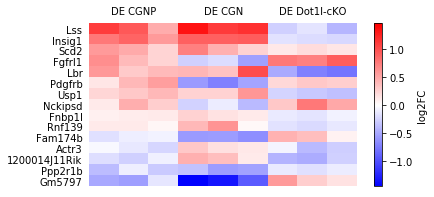

15


,n1_CGNP,n2_CGNP,n3_CGNP,n1_CGN,n2_CGN,n3_CGN,n1,n2,n3
Gene_Symbol,,,,,,,,,
Lss,1.10688,0.94721,0.46834,1.35127,1.12013,1.18003,-0.26863,-0.15091,-0.41483
Insig1,0.77000,0.88740,0.58130,0.91240,0.90670,0.92640,-0.16880,-0.19890,-0.22490
Scd2,0.57320,0.47970,0.24140,0.71980,0.44830,0.25620,0.12760,0.19890,0.13900
Fgfrl1,0.64513,0.39844,0.24772,-0.26570,-0.20498,-0.54477,0.76446,0.72928,0.92027
Lbr,0.58745,0.30320,0.39767,0.41562,0.35089,1.02139,-0.48321,-0.72679,-0.79610
Fam174b,-0.18132,-0.09574,-0.07650,-0.57107,-0.56923,-0.63916,0.43384,0.37200,0.07119
Actr3,-0.03590,-0.13570,-0.23040,0.31250,0.17990,0.12980,-0.06090,-0.39570,-0.27910
1200014J11Rik,-0.18478,-0.26329,-0.08798,0.44706,0.36636,0.11453,-0.42394,-0.47160,-0.27099
Ppp2r1b,-0.38206,-0.10169,-0.30264,-0.34254,-0.56597,-0.52863,-0.11910,-0.17328,-0.10694


In [28]:
import pandas as pd

df = CGNPvsCGNvsAtoh1
#df = CGNPvsCGN
#df = CGNvsAtoh1
#df = CGNPvsAtoh1

heatmappme = df.drop(df.columns[[3,4,5,9,10,11,15,16,17]], axis=1)

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['', 'DE CGNP', '', '', 'DE CGN', '', '','DE Dot1l-cKO',''] #CGNP.axes[1]
data = heatmappme.values #[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)/1.5
 

fig, ax = plt.subplots(figsize=(width, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
#cbar = colorbar(figsize=(width, height))
fig.colorbar(heatmap, label = 'log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/CGNP_CGN_Atoh1p0,05_log2FC-3n.svg", dpi=60)

111


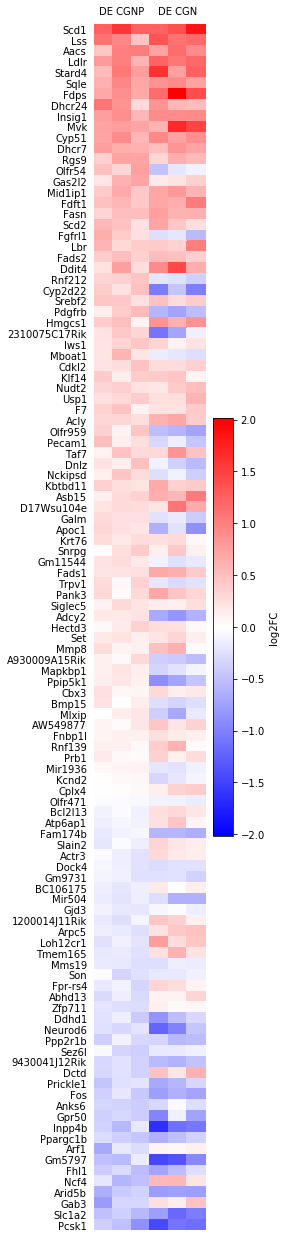

,n1_CGNP,n2_CGNP,n3_CGNP,n1_CGN,n2_CGN,n3_CGN
Gene_Symbol,,,,,,
Scd1,1.25100,1.58458,1.25622,1.25041,1.37290,1.85196
Lss,1.10688,0.94721,0.46834,1.35127,1.12013,1.18003
Aacs,0.44950,1.01921,1.03919,0.73004,1.15734,0.90028
Ldlr,0.80333,1.02309,0.59516,1.22474,1.07713,1.18500
Stard4,0.53744,1.06403,0.77816,1.61383,0.75693,1.25790
Ncf4,-0.19507,-0.59719,-0.49080,0.55316,0.56912,0.20716
Arid5b,-0.64405,-0.42022,-0.34867,-0.78207,-0.75039,-0.76837
Gab3,-0.79162,-0.31967,-0.31992,0.25467,0.13442,0.47814
Slc1a2,-0.49822,-0.37729,-0.55786,-0.76722,-1.18884,-1.03975


In [29]:
## import pandas as pd

#df = CGNPvsCGNvsAtoh1
df = CGNPvsCGN
#df = CGNvsAtoh1
#df = CGNPvsAtoh1

heatmappme = df.drop(df.columns[[3,4,5,9,10,11]], axis=1)

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['', 'DE CGNP', '', '', 'DE CGN'] #CGNP.axes[1]
data = heatmappme.values #[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)/2


fig, ax = plt.subplots(figsize=(width, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, label = 'log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

print(len(heatmappme))
plt.show()
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/CGNP_CGN_p0,05_log2FC-3n.svg", dpi=60)

180


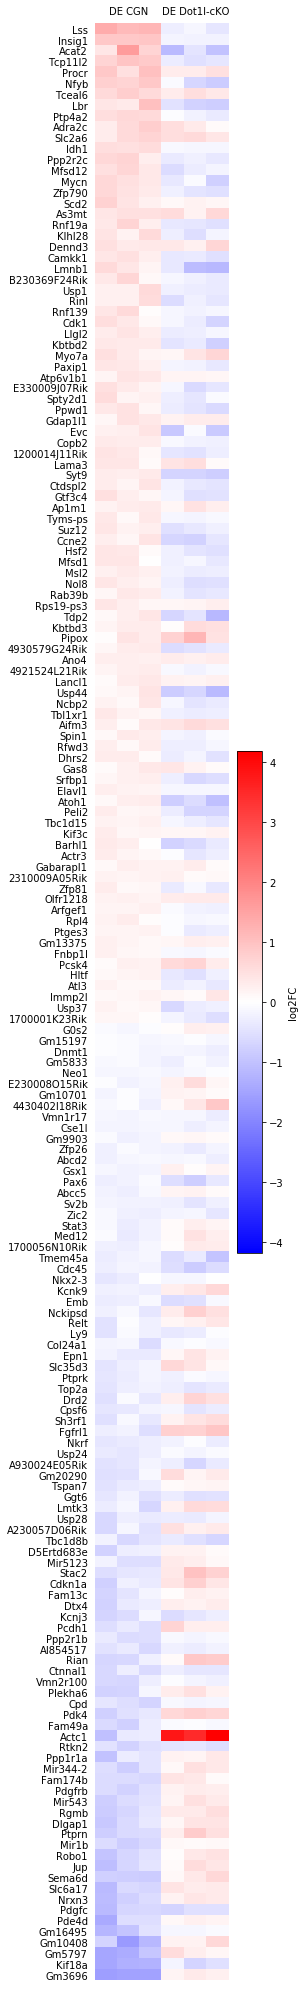

,n1_CGN,n2_CGN,n3_CGN,n1_cKO,n2_cKO,n3_cKO
Gene_Symbol,,,,,,
Lss,1.35127,1.12013,1.18003,-0.26863,-0.15091,-0.41483
Insig1,0.91240,0.90670,0.92640,-0.16880,-0.19890,-0.22490
Acat2,0.41686,1.60624,0.69025,-1.11103,-0.44953,-1.01052
Tcp11l2,0.70680,0.95299,0.86961,-0.31316,-0.51700,-0.40181
Procr,0.88381,0.50613,1.04345,0.30631,0.30449,0.51490
Gm16495,-1.19292,-0.97404,-0.46172,-0.14400,-0.13142,-0.08015
Gm10408,-0.69320,-1.65048,-1.16885,0.20829,0.20609,0.64033
Gm5797,-1.46004,-1.34513,-0.94239,0.57092,0.27410,0.16134
Kif18a,-1.46942,-1.29681,-1.27068,-0.16527,-0.68636,-0.51067


In [30]:
import pandas as pd

#df = CGNPvsCGNvsAtoh1
#df = CGNPvsCGN
df = CGNvsAtoh1
#df = CGNPvsAtoh1

heatmappme = df.drop(df.columns[[3,4,5,9,10,11]], axis=1)

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['', 'DE CGN', '', '','DE Dot1l-cKO',''] #CGNP.axes[1]
data = heatmappme.values #[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)/2
 

fig, ax = plt.subplots(figsize=(width, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
#cbar = colorbar(figsize=(width, height))
fig.colorbar(heatmap, label = 'log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

print(len(heatmappme))
plt.show()
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/CGN_Atoh1p0,05_log2FC-3n.svg", dpi=60)

119


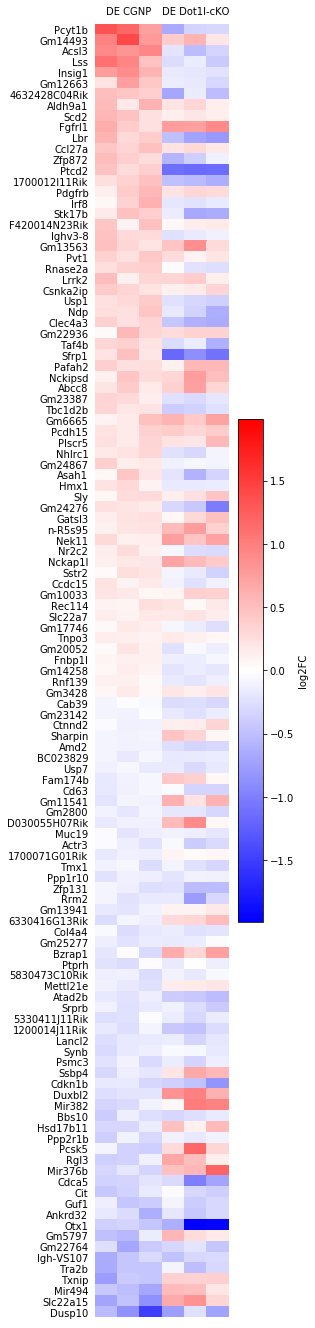

,n1_CGNP,n2_CGNP,n3_CGNP,n1_cKO,n2_cKO,n3_cKO
Gene_Symbol,,,,,,
Pcyt1b,1.33787,1.18196,0.73533,-0.66151,-0.33611,-0.29998
Gm14493,0.96318,1.41850,0.79050,0.38952,0.58436,0.19849
Acsl3,0.91528,0.82979,0.93999,-0.21351,-0.51790,-0.32853
Lss,1.10688,0.94721,0.46834,-0.26863,-0.15091,-0.41483
Insig1,0.77000,0.88740,0.58130,-0.16880,-0.19890,-0.22490
Tra2b,-0.65196,-0.44299,-0.44205,-0.08260,-0.50090,-0.29690
Txnip,-0.77271,-0.40549,-0.44499,0.36630,0.35480,0.37680
Mir494,-0.43184,-0.50584,-0.68603,0.54163,0.49701,0.19036
Slc22a15,-0.70095,-0.47052,-0.86329,0.66110,0.84383,0.32497


In [31]:
import pandas as pd

#df = CGNPvsCGNvsAtoh1
#df = CGNPvsCGN
#df = CGNvsAtoh1
df = CGNPvsAtoh1

heatmappme = df.drop(df.columns[[3,4,5,9,10,11]], axis=1)

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['', 'DE CGNP', '', '','DE Dot1l-cKO',''] #CGNP.axes[1]
data = heatmappme.values #[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)/2
 

fig, ax = plt.subplots(figsize=(width, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
#cbar = colorbar(figsize=(width, height))
fig.colorbar(heatmap, label = 'log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

print(len(heatmappme))
plt.show()
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/CGNP_Atoh1p0,05_log2FC-3n.svg", dpi=60)

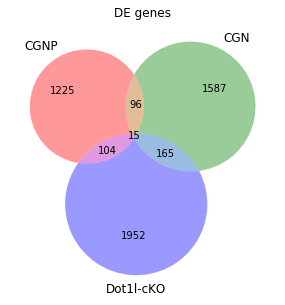

In [32]:
#### from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

fig = plt.figure(figsize=(5,5))
v = venn3(subsets=(len(CGNPplot)-len(CGNPvsCGN)-len(CGNPvsAtoh1)+len(CGNPvsCGNvsAtoh1), 
                   len(CGNplot)-len(CGNPvsCGN)-len(CGNvsAtoh1)+len(CGNPvsCGNvsAtoh1), 
                   len(CGNPvsCGN)-len(CGNPvsCGNvsAtoh1), 
                   len(Atoh1plot)-len(CGNvsAtoh1)-len(CGNPvsAtoh1)+len(CGNPvsCGNvsAtoh1), 
                   len(CGNPvsAtoh1)-len(CGNPvsCGNvsAtoh1), 
                   len(CGNvsAtoh1)-len(CGNPvsCGNvsAtoh1), 
                   len(CGNPvsCGNvsAtoh1), 
                   ), 
          set_labels = ('CGNP', 'CGN', 'Dot1l-cKO'))
#v.get_patch_by_id('100').set_alpha(1.0)
#v.get_patch_by_id('100').set_color('white')
#v.get_label_by_id('100').set_text('Unknown')
#v.get_label_by_id('A').set_text('Set "A"')
#c = venn3_circles(subsets=(len(CGNPplot)-len(CGNPvsCGN)-len(CGNPvsAtoh1)-len(CGNPvsCGNvsAtoh1), 
#                   len(CGNplot)-len(CGNPvsCGN)-len(CGNvsAtoh1)-len(CGNPvsCGNvsAtoh1), 
#                   len(CGNPvsCGN)-len(CGNPvsCGNvsAtoh1), 
#                   len(Atoh1plot)-len(CGNvsAtoh1)-len(CGNPvsCGNvsAtoh1)-len(CGNPvsAtoh1), 
#                   len(CGNPvsAtoh1)-len(CGNPvsCGNvsAtoh1), 
#                   len(CGNvsAtoh1)-len(CGNPvsCGNvsAtoh1), 
#                   len(CGNPvsCGNvsAtoh1)), linewidth=1.0)# linestyle='dashed'
#c.set_lw(1.0)
#c[0].set_ls('dotted')
plt.title("DE genes")
plt.show()
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/CGNPvsCGN_vsAtoh1_p0,05_log2FC-3n.svg", dpi=60)

In [33]:
print(
    96+15+104+1225,
    96+15+165+1587,
    104+15+165+1952,
    1440+1863+2236 
     )

1440 1863 2236 5539


In [34]:
print(len(CGNPplot)+len(CGNplot)+len(Atoh1plot))
len(CGNPplot),len(CGNplot),len(Atoh1plot)

5539


(1440, 1863, 2236)

# DR Intersect for VENN

In [1]:
%matplotlib inline
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.mlab import bivariate_normal
import numpy as np
import scipy
import pylab
import pandas as pd

In [2]:
import os
os.chdir('/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/Homer/')

headername = ['Chr','Start','End','Name','DE_log2FC','Strand','Cluster']

DR_CGNP_CGN = pd.read_csv('./DR_CGNP-CGN_ses.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort').set_index('Name')
DR_CGNP = pd.read_csv('./DR_CGNP_DMSO-DOT1Linh_ses.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort').set_index('Name')
DR_CGN = pd.read_csv('./DR_CGN_DMSO-DOT1Linh_ses.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort').set_index('Name')

os.chdir('/home/patrick/Syncthing/Work/Galaxy20150915/iPython-Transcriptome-Heatmap/')

DR = 'Name', 'DE_log2FC'#, 'DR_FC''

In [3]:
#DR_CGNP_CGN = DR_CGNP_CGN
DR_CGNP_CGN.head(3).append(DR_CGNP_CGN.tail(3))#.values[:,3:4]

,Chr,Start,End,DE_log2FC,Strand,Cluster
Name,,,,,,
Ablim1,chr19,57114708.0,57118069.0,7.715693,-,+FC_DR_CGNP-CGN
Tmem63c,chr12,87030112.0,87032497.0,7.254343,+,+FC_DR_CGNP-CGN
Pdgfb,chr15,80013526.0,80014706.0,7.167103,-,+FC_DR_CGNP-CGN
Pde10a,chr17,8619560.0,8663507.0,-10.494554,+,_-FC_DR_CGNP-CGN
NaN,#+FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN


In [4]:
DR_CGNP.head(3).append(DR_CGNP.tail(3))

,Chr,Start,End,DE_log2FC,Strand,Cluster
Name,,,,,,
Npas4,chr19,4985186.0,4989811.0,3.668928,-,+FC_DR_CGNP_DMSO-DOT1Linh
Astn2,chr4,65934493.0,65936302.0,3.513829,-,+FC_DR_CGNP_DMSO-DOT1Linh
Ctnna2,chr6,77861443.0,77862430.0,3.067666,-,+FC_DR_CGNP_DMSO-DOT1Linh
Col23a1,chr11,51332772.0,51333251.0,-4.420362,+,_-FC_DR_CGNP_DMSO-DOT1Linh
NaN,#+FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN


In [5]:
DR_CGN.head(3).append(DR_CGN.tail(3))

,Chr,Start,End,DE_log2FC,Strand,Cluster
Name,,,,,,
.,chr17,8523014.0,8613619.0,13.627432,.,+FC_DR_CGN_DMSO-DOT1Linh
Ryr2,chr13,11994103.0,12042285.0,12.147382,-,+FC_DR_CGN_DMSO-DOT1Linh
.,chr19,10389069.0,10414893.0,11.777496,.,+FC_DR_CGN_DMSO-DOT1Linh
.,chr1,17723493.0,17732467.0,-8.601214,.,_-FC_DR_CGN_DMSO-DOT1Linh
NaN,#+FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN


In [6]:
#intersections:
print(len(DR_CGNP_CGN),
len(DR_CGNP),
len(DR_CGN),)

1208 197 8737


In [7]:
#dfx = pd.DataFrame(gedöns)
df0 = DR_CGNP_CGN#.set_index('Name')
df1 = DR_CGNP#.set_index('Name')
df2 = DR_CGN#.set_index('Name')

frames = [df0, df1, df2]
result = pd.concat(frames)
print(len(result) == len(df0)+len(df1)+len(df2))
len(df0)+len(df1)+len(df2)

True


10142

In [8]:
DR_CGNPCGN_CGNP = df01 = table = pd.merge(df0, df1, left_index=True, right_index=True, how='inner', suffixes=('_df0', '_df1')).sort_values(by= 'DE_log2FC_df0', ascending=False, kind='quicksort')
print(len(table)),
table.head(3).append(table.tail(3))

18187


,Chr_df0,Start_df0,End_df0,DE_log2FC_df0,Strand_df0,Cluster_df0,Chr_df1,Start_df1,End_df1,DE_log2FC_df1,Strand_df1,Cluster_df1
Name,,,,,,,,,,,,
.,chr7,135689717.0,135716850.0,7.060924,.,+FC_DR_CGNP-CGN,chr2,84505927.0,84507058.0,2.066511,.,+FC_DR_CGNP_DMSO-DOT1Linh
.,chr7,135689717.0,135716850.0,7.060924,.,+FC_DR_CGNP-CGN,chr1,34726600.0,34728511.0,-1.324339,.,_-FC_DR_CGNP_DMSO-DOT1Linh
.,chr7,135689717.0,135716850.0,7.060924,.,+FC_DR_CGNP-CGN,chr2,155626160.0,155640750.0,1.072519,.,+FC_DR_CGNP_DMSO-DOT1Linh
NaN,#+FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#+FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN


In [9]:
DR_CGNPCGN_CGN = df02 = table = pd.merge(df0, df2, left_index=True, right_index=True, how='inner', suffixes=('_df0', '_df2')).sort_values(by= 'DE_log2FC_df0', ascending=False, kind='quicksort')
print(len(table)),
table.head(3).append(table.tail(3))

845510


,Chr_df0,Start_df0,End_df0,DE_log2FC_df0,Strand_df0,Cluster_df0,Chr_df2,Start_df2,End_df2,DE_log2FC_df2,Strand_df2,Cluster_df2
Name,,,,,,,,,,,,
Tmem63c,chr12,87030112.0,87032497.0,7.254343,+,+FC_DR_CGNP-CGN,chr12,87026836.0,87028437.0,-1.054983,+,_-FC_DR_CGN_DMSO-DOT1Linh
Tmem63c,chr12,87030112.0,87032497.0,7.254343,+,+FC_DR_CGNP-CGN,chr12,87038266.0,87039749.0,-3.048229,+,_-FC_DR_CGN_DMSO-DOT1Linh
.,chr7,135689717.0,135716850.0,7.060924,.,+FC_DR_CGNP-CGN,chr17,8523014.0,8613619.0,13.627432,.,+FC_DR_CGN_DMSO-DOT1Linh
NaN,#+FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#+FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN


In [10]:
DEDR_CGNP_CGN = df12 = table = pd.merge(df1, df2, left_index=True, right_index=True, how='inner', suffixes=('_df1', '_df2')).sort_values(by= 'DE_log2FC_df1', ascending=False, kind='quicksort')
print(len(table)),
table.head(3).append(table.tail(3))

117342


,Chr_df1,Start_df1,End_df1,DE_log2FC_df1,Strand_df1,Cluster_df1,Chr_df2,Start_df2,End_df2,DE_log2FC_df2,Strand_df2,Cluster_df2
Name,,,,,,,,,,,,
Astn2,chr4,65934493.0,65936302.0,3.513829,-,+FC_DR_CGNP_DMSO-DOT1Linh,chr4,66292750.0,66355931.0,1.092065,-,+FC_DR_CGN_DMSO-DOT1Linh
Astn2,chr4,65934493.0,65936302.0,3.513829,-,+FC_DR_CGNP_DMSO-DOT1Linh,chr4,65880766.0,65881955.0,4.542219,-,+FC_DR_CGN_DMSO-DOT1Linh
Astn2,chr4,65934493.0,65936302.0,3.513829,-,+FC_DR_CGNP_DMSO-DOT1Linh,chr4,66143461.0,66290961.0,1.240786,-,+FC_DR_CGN_DMSO-DOT1Linh
NaN,#+FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN,#+FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN


In [11]:
middle = df012 =table = pd.merge(df01, df2, left_index=True, right_index=True, how='inner', suffixes=('_df01', '_df2'))#.sort_values(by= 'DE_log2FC_df01', ascending=False, kind='quicksort')
print(len(table)),
table.head(3).append(table.tail(3))

42029594


,Chr_df0,Start_df0,End_df0,DE_log2FC_df0,Strand_df0,Cluster_df0,Chr_df1,Start_df1,End_df1,DE_log2FC_df1,Strand_df1,Cluster_df1,Chr,Start,End,DE_log2FC,Strand,Cluster
Name,,,,,,,,,,,,,,,,,,
.,chr7,135689717.0,135716850.0,7.060924,.,+FC_DR_CGNP-CGN,chr2,84505927.0,84507058.0,2.066511,.,+FC_DR_CGNP_DMSO-DOT1Linh,chr17,8523014.0,8613619.0,13.627432,.,+FC_DR_CGN_DMSO-DOT1Linh
.,chr7,135689717.0,135716850.0,7.060924,.,+FC_DR_CGNP-CGN,chr2,84505927.0,84507058.0,2.066511,.,+FC_DR_CGNP_DMSO-DOT1Linh,chr19,10389069.0,10414893.0,11.777496,.,+FC_DR_CGN_DMSO-DOT1Linh
.,chr7,135689717.0,135716850.0,7.060924,.,+FC_DR_CGNP-CGN,chr2,84505927.0,84507058.0,2.066511,.,+FC_DR_CGNP_DMSO-DOT1Linh,chr2,94247842.0,94264754.0,11.447891,.,+FC_DR_CGN_DMSO-DOT1Linh
NaN,#_-FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#+FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN,#+FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN
NaN,#_-FC_DR_CGNP-CGN,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGNP_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN,#_-FC_DR_CGN_DMSO-DOT1Linh,NaN,NaN,NaN,NaN,NaN


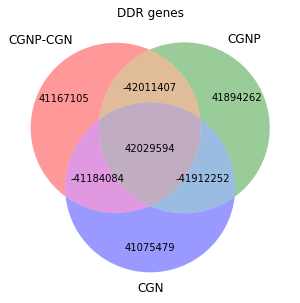

In [12]:
#VENN in vivo
#### from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

fig = plt.figure(figsize=(5,5))
v = venn3(subsets=(len(df0)-len(df01)-len(df02)+len(df012), 
                   len(df1)-len(df01)-len(df12)+len(df012), 
                   len(df01)-len(df012), 
                   len(df2)-len(df12)-len(df02)+len(df012), 
                   len(df02)-len(df012), 
                   len(df12)-len(df012), 
                   len(df012), 
                   ), 
          set_labels = ('CGNP-CGN', 'CGNP', 'CGN'))
plt.title("DDR genes")
plt.show()
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/VENN_DE-DR.svg", dpi=60)

## genes from GOs of DR CGNPvsCGN to DE CGNPvsCGN

In [47]:
#top and botom 5 Transcriptom
print(len(CGNP_CGNplot)),
CGNP_CGNplot.head(3).append(CGNP_CGNplot.tail(3))

9147


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Gene_Symbol,,,,,,
Cp,5.50218,5.09918,5.18188,5.261080,0.000011,38.3484
Saa3,5.48483,5.44604,4.75790,5.229590,0.000043,37.5200
Apod,4.78290,5.19496,2.51639,4.164750,0.004128,17.9354
Mndal,-4.01915,-3.47399,-3.58166,-3.691600,0.000985,-12.9206
Gm42035,-3.35747,-5.30051,-5.47860,-4.712193,0.000699,-26.2127
Gm3579,-3.35747,-5.30051,-5.47860,-4.712193,0.000699,-26.2127


### This is GO_filtered_for_locomo vs DE CGNP-CGN

In [48]:
#infile = "/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/BiNGO/DR_-FC_CGNP_DMSO_CGN-locomotory_behavior.txt"
#!thunar /home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/BiNGO/

In [49]:
# +FC DR GO_filtered_for_locomo*
infile = '/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/BiNGO/CGNP_CGN/GO_filtered_for_locomo+FC.txt'

In [50]:
with open(infile, "r") as f:
    lines = f.read()
GOgenes = lines.split("|")

In [51]:
GOhit = []
df =  CGNP_CGNplot
i = 0
for row in df.iterrows():
    if str(row[0]).upper() in GOgenes:
        GOhit.append(df.iloc[i])
    i += 1

GOplot1 = pd.DataFrame(GOhit)
GOplot1.head(2).append(GOplot1.tail(2))

,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Crhr1,2.86067,2.83972,3.23425,2.978213,0.000481,7.88009
Dscam,2.80912,2.78201,2.26648,2.619203,0.000374,6.14410
Ptpn11,-0.96245,-0.75068,-0.70123,-0.804787,0.002521,-1.74688
Efna3,-1.05575,-0.57055,-1.17300,-0.933100,0.011631,-1.90937


In [52]:
# -FC DR GO_filtered_for_locomo*
infile = '/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/BiNGO/CGNP_CGN/GO_filtered_for_locomo-FC.txt'

In [53]:
with open(infile, "r") as f:
    lines = f.read()
GOgenes = lines.split("|")

In [54]:
GOhit = []
df =  CGNP_CGNplot
i = 0
for row in df.iterrows():
    if str(row[0]).upper() in GOgenes:
        GOhit.append(df.iloc[i])
    i += 1

GOplot2 = pd.DataFrame(GOhit)
GOplot2.head(3).append(GOplot2.tail(3))

,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Nr4a2,2.27146,2.19474,2.00929,2.158497,0.000259,4.46445
Cacna1e,2.18494,2.30532,1.60124,2.030500,0.000652,4.08547
Epha3,1.62842,1.43937,1.36312,1.476970,0.000151,2.78363
Ddr2,-1.67869,-0.80465,-0.73264,-1.071993,0.012110,-2.10233
Satb2,-1.16076,-1.44333,-1.61917,-1.407753,0.008888,-2.65324
Dcc,-1.41585,-1.38244,-1.56820,-1.455497,0.000738,-2.74251


In [55]:
GOplot = GOplot1.append(GOplot2)
print(len(GOplot))
GOplot[:5]

54


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Crhr1,2.86067,2.83972,3.23425,2.978213,0.000481,7.88009
Dscam,2.80912,2.78201,2.26648,2.619203,0.000374,6.14410
Grm1,1.61777,2.32777,2.47227,2.139270,0.000688,4.40538
Kif26b,1.46248,2.15489,0.90054,1.505970,0.004298,2.84016
Lrp8,1.21192,1.76260,1.37997,1.451497,0.002103,2.73491


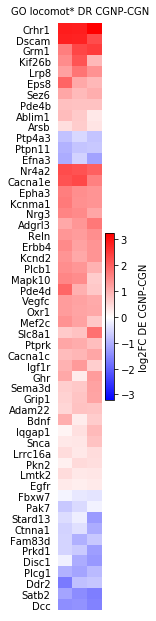

54


In [56]:
import pandas as pd

heatmappme = GOplot

column_labels = heatmappme.index#'' #heatmappme.index #CGNP.axes[0]
row_labels = ['','GO locomot* DR CGNP-CGN',''] #CGNP.axes[1]
data = heatmappme.values[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(1, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC DE CGNP-CGN')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
#heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/DE_GO_locomot_DR+-FC_CGNP-CGN.svg", dpi=60)

### This is GO_filtered_for_locomo* vs DE Dot1l-cKO<sup>Atho1</sup>

In [57]:
#infile = "/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/BiNGO/DR_-FC_CGNP_DMSO_CGN-locomotory_behavior.txt"
#!thunar /home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/BiNGO/

In [58]:
# +FC DR GO_filtered_for_locomo*
infile = '/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/BiNGO/CGNP_CGN/GO_filtered_for_locomo+FC.txt'

In [59]:
with open(infile, "r") as f:
    lines = f.read()
GOgenes = lines.split("|")
type(GOgenes)

list

In [60]:
GOhit = []
df =  Atoh1plot
i = 0
for row in df.iterrows():
    if str(row[0]).upper() in GOgenes:
        GOhit.append(df.iloc[i])
    i += 1

GOplot1 = pd.DataFrame(GOhit)
GOplot1.head(3).append(GOplot1.tail(3))

,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Sema6d,0.11535,0.38308,0.63429,0.377573,0.031953,1.29915
Atp7a,-0.28989,-0.33866,-0.77812,-0.468890,0.042096,-1.38404
Sema6d,0.11535,0.38308,0.63429,0.377573,0.031953,1.29915
Atp7a,-0.28989,-0.33866,-0.77812,-0.468890,0.042096,-1.38404


In [61]:
# -FC DR GO_filtered_for_locomo*
infile = '/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/BiNGO/CGNP_CGN/GO_filtered_for_locomo-FC.txt'

In [62]:
with open(infile, "r") as f:
    lines = f.read()
GOgenes = lines.split("|")
GOgenes[:5]

['TMOD1', 'KCND2', 'ADAM22', 'CACNA1C', 'CACNA1E']

In [63]:
GOhit = []
df =  Atoh1plot
i = 0
for row in df.iterrows():
    if str(row[0]).upper() in GOgenes:
        GOhit.append(df.iloc[i])
    i += 1

GOplot2 = pd.DataFrame(GOhit)
GOplot2.append(GOplot2)

,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Sema4a,0.25276,1.04512,0.63500,0.644293,0.020320,1.56297
Robo1,0.05163,0.37775,0.46073,0.296703,0.033693,1.22834
Pde4d,0.11204,0.23683,0.16857,0.172480,0.020852,1.12700
Ptprk,-0.24683,-0.09020,-0.13807,-0.158367,0.031569,-1.11602
Sema4a,0.25276,1.04512,0.63500,0.644293,0.020320,1.56297
Robo1,0.05163,0.37775,0.46073,0.296703,0.033693,1.22834
Pde4d,0.11204,0.23683,0.16857,0.172480,0.020852,1.12700
Ptprk,-0.24683,-0.09020,-0.13807,-0.158367,0.031569,-1.11602


In [64]:
GOplot = GOplot1.append(GOplot2)
print(len(GOplot))
GOplot

6


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Sema6d,0.11535,0.38308,0.63429,0.377573,0.031953,1.29915
Atp7a,-0.28989,-0.33866,-0.77812,-0.468890,0.042096,-1.38404
Sema4a,0.25276,1.04512,0.63500,0.644293,0.020320,1.56297
Robo1,0.05163,0.37775,0.46073,0.296703,0.033693,1.22834
Pde4d,0.11204,0.23683,0.16857,0.172480,0.020852,1.12700
Ptprk,-0.24683,-0.09020,-0.13807,-0.158367,0.031569,-1.11602


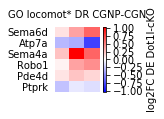

6


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Sema6d,0.11535,0.38308,0.63429,0.377573,0.031953,1.29915
Atp7a,-0.28989,-0.33866,-0.77812,-0.468890,0.042096,-1.38404
Sema4a,0.25276,1.04512,0.63500,0.644293,0.020320,1.56297
Robo1,0.05163,0.37775,0.46073,0.296703,0.033693,1.22834
Pde4d,0.11204,0.23683,0.16857,0.172480,0.020852,1.12700
Atp7a,-0.28989,-0.33866,-0.77812,-0.468890,0.042096,-1.38404
Sema4a,0.25276,1.04512,0.63500,0.644293,0.020320,1.56297
Robo1,0.05163,0.37775,0.46073,0.296703,0.033693,1.22834
Pde4d,0.11204,0.23683,0.16857,0.172480,0.020852,1.12700
Ptprk,-0.24683,-0.09020,-0.13807,-0.158367,0.031569,-1.11602


In [65]:
#from matplotlib.mlab import bivariate_normal
import pandas as pd
#Atoh1_15 = pd.read_table('Atoh1CreVsWT-Heatmap_FC+-1,5.txt', index_col=0)#, row_labels=0)

heatmappme = GOplot #CGNP_CGNplot

column_labels = heatmappme.index#'' #heatmappme.index #CGNP.axes[0]
row_labels = ['','GO locomot* DR CGNP-CGN',''] #CGNP.axes[1]
data = heatmappme.values[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(1, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC DE Dot1l-cKO')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/DE_GO_locomot_DR+-FC_CGNP-CGN-new.svg", dpi=60)

#  homer.pl bzw findGO.pl of DE genes and plot top 20 GOterms most sign.

In [66]:
print(CGNP_CGN_GO.head(2).append(CGNP_CGN_GO.tail(2))),
print(CGNP_GO.head(2).append(CGNP_GO.tail(2))),
print(CGN_GO.head(2).append(CGN_GO.tail(2))),
print(Atoh1_GO.head(2).append(Atoh1_GO.tail(2)))

Empty DataFrame
Columns: []
Index: [Cp, Saa3, Gm42035, Gm3579]
Empty DataFrame
Columns: []
Index: [Gm22935, Scd1, Gm25227, Dusp10]
Empty DataFrame
Columns: []
Index: [Fdps, Scd1, Hpgd, Kcna4]
Empty DataFrame
Columns: []
Index: [Actc1, Tmem8c, Ptcd2, Otx1]


In [67]:
#!cd ../All_GO-BiNGO_DAVID-Transcriptom/Homer/
#!ls

In [68]:
#os.chdir('/home/patrick/homer')
#!ls
#!perl ~/homer/configureHomer.pl -list

#!nano ~/homer/config.txt

Homer uses http://www.geneontology.org for GO

In [69]:
#do it in comand line not in python (witout '!')!!!!!

#!findGO.pl '../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_CGN_GO.txt' mouse './CGNP_CGN/'
#!findGO.pl '../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_GO.txt' mouse './CGNP/'
#!findGO.pl '../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGN_GO.txt' mouse './CGN/'
#!findGO.pl '../All_GO-BiNGO_DAVID-Transcriptom/Homer/Atoh1_GO.txt' mouse './Atoh1/'

In [70]:
#!ls

In [71]:
#cd('/home/patrick/Syncthing/Work/Galaxy20150915/iPython-Transcriptome-Heatmap/')
#!ls

In [72]:
%matplotlib inline
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.mlab import bivariate_normal
import numpy as np
import scipy
import pylab
import pandas as pd

In [73]:
GO_CGNP_CGN = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_CGN/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_CGNP_CGNneg= pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_CGN-1,5FC/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_CGNP_CGNpos= pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP_CGN+1,5FC/biological_process.csv', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')

GO_CGNP = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_CGNPneg = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP-1,5FC/biological_process.csv', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_CGNPpos = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGNP+1,5FC/biological_process.csv', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')

GO_CGN = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGN/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_CGNneg = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGN-1,5FC/biological_process.csv', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_CGNpos = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/CGN+1,5FC/biological_process.csv', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')

GO_Atoh1 = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/Atoh1/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_Atoh1neg = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/Atoh1-1,5FC/biological_process.csv', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_Atoh1pos = pd.read_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/Atoh1+1,5FC/biological_process.csv', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')

In [74]:
GO_CGNP_CGN.head(1)

,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
cellular process,GO:0009987,1.820000e-97,-223.0,13781,4900,0.690335,7098,23383,"28019,257939,56458,258803,216344,258362,18606,...","Ing4,Olfr527,Foxo1,Olfr136,Rab21,Olfr1094,Enpp..."


In [75]:
GO_CGNP_CGN.values[:1,4:5]

array([[4900]], dtype=object)

In [76]:
len(GO_CGNP_CGN), len(GO_CGNP), len(GO_CGN), len(GO_Atoh1)

(14100, 14100, 14100, 14100)

In [77]:
pvalue = 'Enrichment <= 0.05'
len(GO_CGNP_CGN.query(pvalue)), len(GO_CGNP.query(pvalue)), len(GO_CGN.query(pvalue)), len(GO_Atoh1.query(pvalue))

(2116, 485, 1169, 1006)

In [78]:
GO_CGNP_CGN.values[:5,3:4]

array([[13781],
       [4567],
       [4418],
       [5255],
       [6834]], dtype=object)

In [79]:
GO_CGNP_CGN.index[:5]

Index(['cellular process',
       'cellular component organization or biogenesis',
       'cellular component organization',
       'cellular macromolecule metabolic process',
       'cellular metabolic process'],
      dtype='object', name='Term')

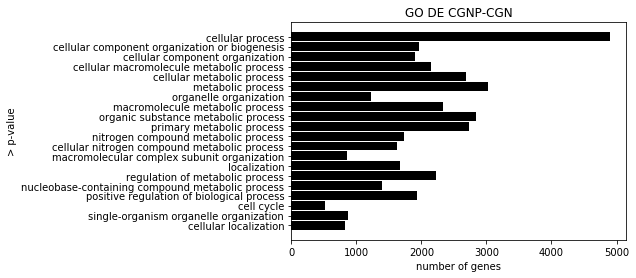

In [80]:
import numpy as np

GO = GO_CGNP_CGN[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGNP-CGN'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGNP-CGN-top20.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

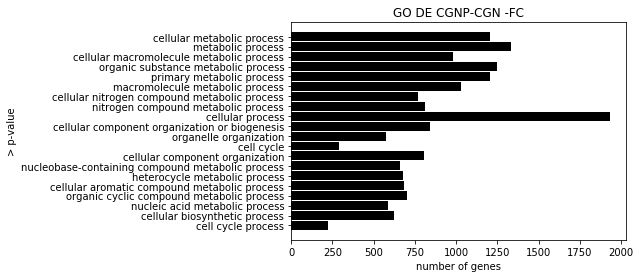

In [81]:
import numpy as np

GO = GO_CGNP_CGNneg[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGNP-CGN -FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGNP-CGN-top20-neg.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

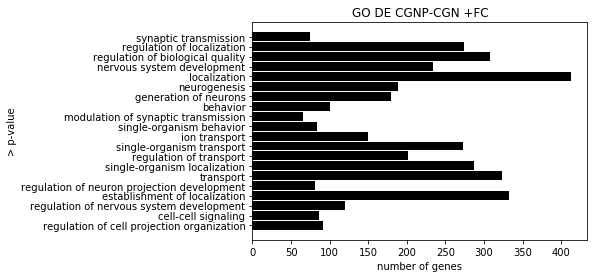

In [82]:
import numpy as np

GO = GO_CGNP_CGNpos[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGNP-CGN +FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGNP-CGN-top20-pos.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

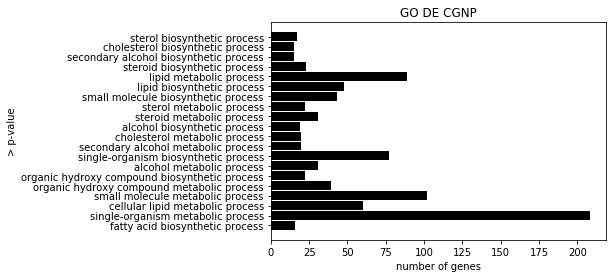

In [83]:
import numpy as np

GO = GO_CGNP[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGNP'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)#
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 10))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGNP-top20.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

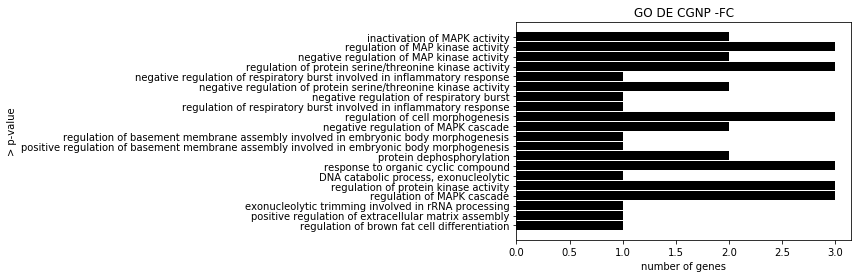

In [84]:
import numpy as np

GO = GO_CGNPneg[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGNP -FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)#
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 10))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGNP-top20-neg.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

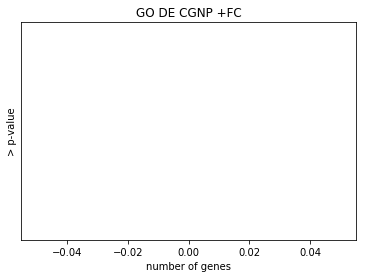

In [85]:
import numpy as np

GO = GO_CGNPpos[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGNP +FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)#
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 10))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGNP-top20-pos.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

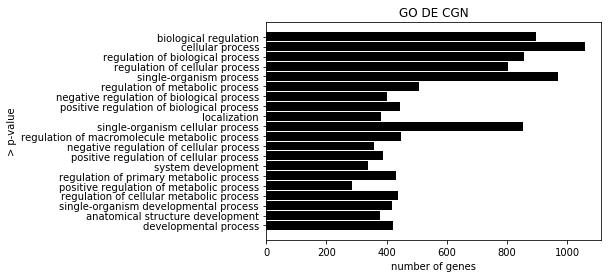

In [86]:
import numpy as np

GO = GO_CGN[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGN'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGN-top20.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

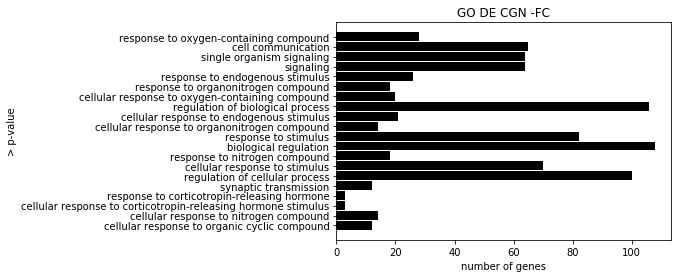

In [87]:
import numpy as np

GO = GO_CGNneg[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGN -FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGN-top20-neg.svg", dpi=300)
#plt.show()
#GO.head(1).append(GO.tail(1))

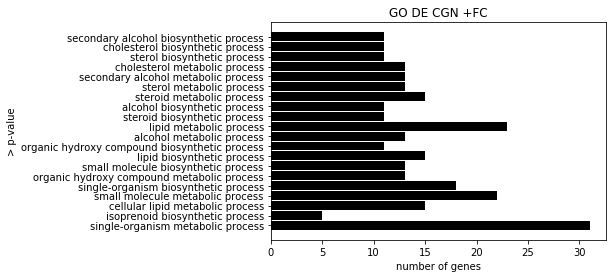

In [88]:
import numpy as np

GO = GO_CGNpos[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE CGN +FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_CGN-top20-pos.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

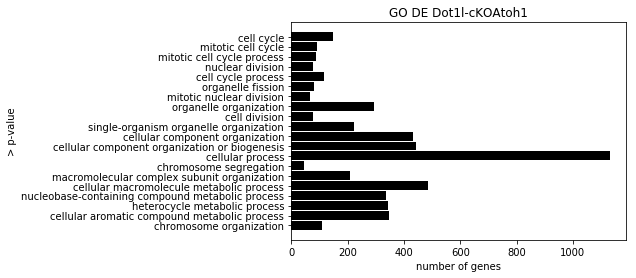

In [89]:
import numpy as np

GO = GO_Atoh1[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE Dot1l-cKOAtoh1'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_Atoh1-top20.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

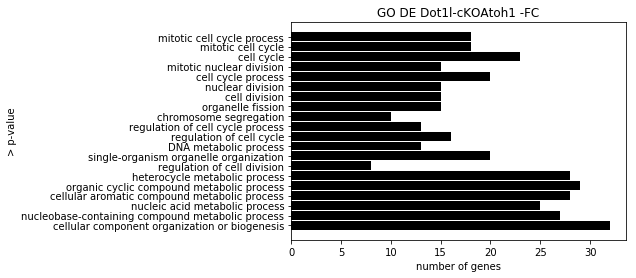

In [90]:
import numpy as np

GO = GO_Atoh1neg[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE Dot1l-cKOAtoh1 -FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_Atoh1-top20-neg.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

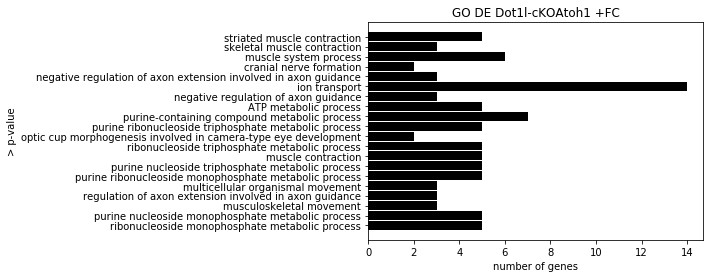

In [91]:
import numpy as np

GO = GO_Atoh1pos[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DE Dot1l-cKOAtoh1 +FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DE_Atoh1-top20-pos.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

# START filter DE GOs

# GO_CGNP-CGN-loco DE

In [92]:
#GO_Atoh1.tail(3)

In [93]:
 #How to filter this for loco* in 'Term'?
GO_CGNP_CGN_loco = GO_CGNP_CGN.drop(NaN).index #here needs to be the filtered output

filtered = []
for term in GO_CGNP_CGN_loco:
#    print(term)
    if "locomo" in term:
        filtered.append(term)
locomoto = pd.DataFrame(GO_CGNP_CGN.drop(NaN)[GO_CGNP_CGN.drop(NaN).index.isin(filtered)]).query(pvalue)
print(len(locomoto))
#locomoto.head(2).append(locomoto.tail(2))

6


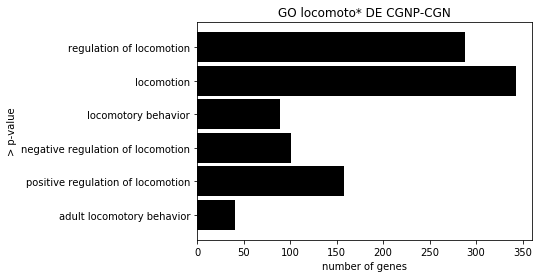

In [94]:
import numpy as np

GO = locomoto.sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO locomoto* DE CGNP-CGN'

Term = GO.index[:]
y_pos = np.arange(len(Term))
performance = GO.values[:,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_CGNP-CGN.svg", dpi=300)
plt.show()
#GO.tail(3)

In [95]:
 #How to filter this for loco* in 'Term'?
GO_CGNP_CGN_loco = GO_CGNP_CGNneg.drop(NaN).index #here needs to be the filtered output

filtered = []
for term in GO_CGNP_CGN_loco:
#    print(term)
    if "locomo" in term:
        filtered.append(term)
locomoto_neg = pd.DataFrame(GO_CGNP_CGNneg.drop(NaN)[GO_CGNP_CGNneg.drop(NaN).index.isin(filtered)]).query(pvalue)
print(len(locomoto_neg))

2


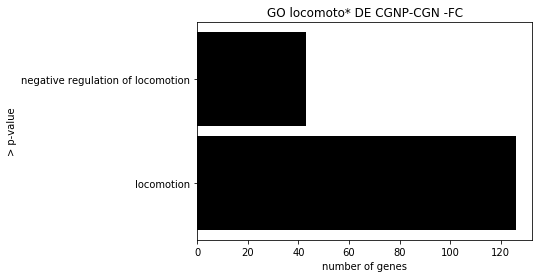

In [96]:
import numpy as np

GO = locomoto_neg.sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO locomoto* DE CGNP-CGN -FC'

Term = GO.index[:]
y_pos = np.arange(len(Term))
performance = GO.values[:,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_CGNP-CGN-neg.svg", dpi=300)
plt.show()
#GO

In [97]:
 #How to filter this for loco* in 'Term'?
GO_CGNP_CGN_loco = GO_CGNP_CGNpos.drop(NaN).index #here needs to be the filtered output

filtered = []
for term in GO_CGNP_CGN_loco:
#    print(term)
    if "locomo" in term:
        filtered.append(term)
locomoto_pos = pd.DataFrame(GO_CGNP_CGNpos.drop(NaN)[GO_CGNP_CGNpos.drop(NaN).index.isin(filtered)]).query(pvalue)
print(len(locomoto_pos))
#locomoto.head(2).append(locomoto.tail(2))

8


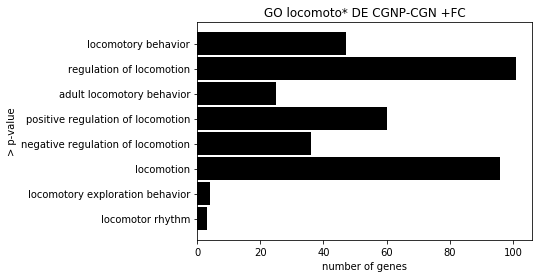

In [98]:
import numpy as np

GO = locomoto_pos.sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO locomoto* DE CGNP-CGN +FC'

Term = GO.index[:]
y_pos = np.arange(len(Term))
performance = GO.values[:,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_CGNP-CGN-pos.svg", dpi=300)
plt.show()
#GO

## Plot all GO_CGNP-CGN-loco DE genes to CGNP_CGNplot for heatmap

In [99]:
import math
GOgenes = locomoto.loc[:,['Gene Symbols']]
x = []
for genes in list(GOgenes.values): 
    for gene in genes:
        if type(gene) is float: continue
        x.extend(gene.split(","))
locosucks = list(set(x))
print(len(locosucks))
locosucks[:5]

578


['Kit', 'Sema4d', 'Lrrk2', 'Lama2', 'Spag6']

In [100]:
#for each hit in 'Gene Symbol' in GO_CGNP_CGN_loco search in 'Gene_Symbol' of CGNP_CGNplot 
len(CGNP_CGNplot)

9147

In [101]:
GOhit = []
df =  CGNP_CGNplot
i = 0
for row in df.iterrows():
    if str(row[0]) in locosucks:
        GOhit.append(df.iloc[i])
    i += 1

GOplot = pd.DataFrame(GOhit)
print(len(GOplot))
#GOplot.head(5).append(GOplot.tail(5))

578


384


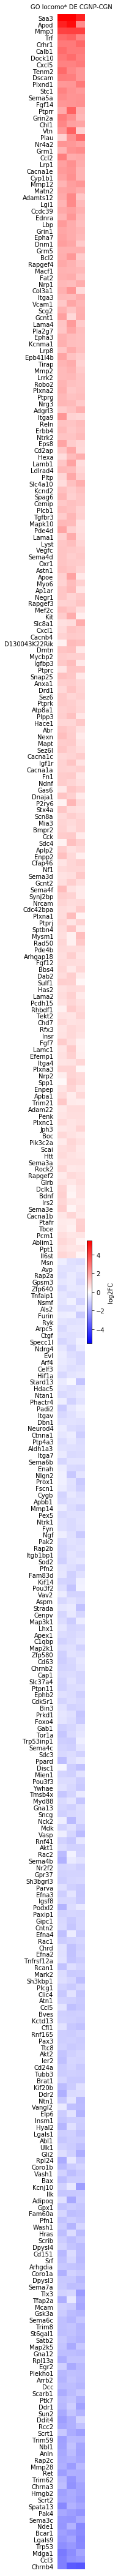

,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Saa3,5.48483,5.44604,4.75790,5.229590,0.000043,37.52000
Apod,4.78290,5.19496,2.51639,4.164750,0.004128,17.93540
Mmp3,4.05884,4.08120,4.08163,4.073890,0.000004,16.84080
Trf,3.17322,3.34499,2.63516,3.051123,0.000099,8.28855
Crhr1,2.86067,2.83972,3.23425,2.978213,0.000481,7.88009
Lgals9,-2.21584,-1.93940,-2.60458,-2.253273,0.000217,-4.76762
Trp53,-2.42222,-2.19003,-2.55977,-2.390673,0.000046,-5.24404
Mdga1,-2.86075,-2.44467,-1.95461,-2.420010,0.000358,-5.35175
Ccl3,-2.74114,-2.34204,-2.18727,-2.423483,0.000912,-5.36466
Chrnb4,-2.72412,-3.54483,-3.63882,-3.302590,0.000094,-9.86683


In [102]:
import pandas as pd
heatmappme = GOplot.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5') #CGNP_CGNplot

column_labels = heatmappme.index#'' #heatmappme.index #CGNP.axes[0]
row_labels = ['','GO locomo* DE CGNP-CGN',''] #CGNP.axes[1]
data = heatmappme.values[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(1, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')# >1.5 or <-1.5 DE CGNP-CGN')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

print(len(heatmappme))
plt.show()
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_CGNP-CGN-heat.svg", dpi=300)

# GO_CGNP-loco DE

In [103]:
 #How to filter this for loco* in 'Term'?
#GO_CGNP_CGN_loco = GO_CGNP_CGN.drop(NaN).index #here needs to be the filtered output
GO_CGNP_loco = GO_CGNP.drop(NaN).index #here needs to be the filtered output

filtered = []
for term in GO_CGNP_loco:
#    print(term)
    if "locomo" in term:
        filtered.append(term)
locomoto = pd.DataFrame(GO_CGNP.drop(NaN)[GO_CGNP.drop(NaN).index.isin(filtered)]).query(pvalue)
print(len(locomoto))
locomoto.head(2)

1


,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
locomotor rhythm,GO:0045475,0.00172,-6.37,13,4,0.004016,996,23383,"18143,229599,17201,16508","Npas2,Ciart,Mc3r,Kcnd2"


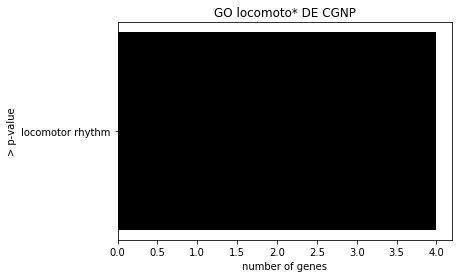

In [104]:
import numpy as np

GO = locomoto.sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO locomoto* DE CGNP'

Term = GO.index[:]
y_pos = np.arange(len(Term))
performance = GO.values[:,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_CGNP.svg", dpi=300)
plt.show()

In [105]:
import math
GOgenes = locomoto.loc[:,['Gene Symbols']]
x = []
for genes in list(GOgenes.values): 
    for gene in genes:
        if type(gene) is float: continue
        x.extend(gene.split(","))
locosucks = list(set(x))
print(len(locosucks))
locosucks[:5]

4


['Kcnd2', 'Npas2', 'Ciart', 'Mc3r']

In [106]:
#for each hit in 'Gene Symbol' in GO_CGNP_CGN_loco search in 'Gene_Symbol' of CGNP_CGNplot 
len(CGNPplot)

1440

In [107]:
GOhit = []
df =  CGNPplot
i = 0
for row in df.iterrows():
    if str(row[0]) in locosucks:
        GOhit.append(df.iloc[i])
    i += 1

GOplot = pd.DataFrame(GOhit)
print(len(GOplot))
#GOplot.head(5).append(GOplot.tail(5))

4


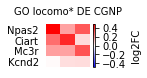

4


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Npas2,0.48954,0.17600,0.31798,0.327840,0.009415,1.25513
Ciart,0.27568,0.41183,0.07143,0.252980,0.027451,1.19167
Mc3r,0.18542,0.17695,0.32894,0.230437,0.035828,1.17319
Kcnd2,0.00920,0.06310,0.06750,0.046600,0.037183,1.03282
Npas2,0.48954,0.17600,0.31798,0.327840,0.009415,1.25513
Ciart,0.27568,0.41183,0.07143,0.252980,0.027451,1.19167
Mc3r,0.18542,0.17695,0.32894,0.230437,0.035828,1.17319
Kcnd2,0.00920,0.06310,0.06750,0.046600,0.037183,1.03282


In [108]:
#from matplotlib.mlab import bivariate_normal
import pandas as pd
#Atoh1_15 = pd.read_table('Atoh1CreVsWT-Heatmap_FC+-1,5.txt', index_col=0)#, row_labels=0)

heatmappme = GOplot#.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5') #CGNP_CGNplot

column_labels = heatmappme.index#'' #heatmappme.index #CGNP.axes[0]
row_labels = ['','GO locomo* DE CGNP',''] #CGNP.axes[1]
data = heatmappme.values[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(1, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')
             # >1.5 or <-1.5 DE CGNP-CGN')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_CGNP-heat.svg", dpi=300)

# GO_CGN-loco DE

In [109]:
GO_CGN.head(2)

,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
biological regulation,GO:0065007,1.270000e-21,-48.1,11081,896,0.591810,1514,23383,"14397,21960,217995,56486,74194,12925,83945,755...","Gabra4,Tnr,Heatr1,Gabarap,Rnd3,Crip1,Dnaja3,Zb..."
cellular process,GO:0009987,3.350000e-20,-44.8,13781,1059,0.699472,1514,23383,"14397,21960,56448,71446,238831,70356,272643,75...","Gabra4,Tnr,Cyp2d22,Wrb,Ppwd1,St13,Prss43,Zbtb4..."


In [110]:
 #How to filter this for loco* in 'Term'?
#GO_CGNP_CGN_loco = GO_CGNP_CGN.drop(NaN).index #here needs to be the filtered output
GO_CGN_loco = GO_CGN.drop(NaN).index #here needs to be the filtered output

filtered = []
for term in GO_CGN_loco:
#    print(term)
    if "locomo" in term:
        filtered.append(term)
locomoto = pd.DataFrame(GO_CGN.drop(NaN)[GO_CGN.drop(NaN).index.isin(filtered)]).query(pvalue)
print(len(locomoto))
locomoto.head(2)

6


,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
locomotory behavior,GO:0007626,0.000001,-13.8,223,35,0.023118,1514,23383,"18227,14811,64297,13489,18419,12286,14810,1229...","Nr4a2,Grin2a,Gprc5b,Drd2,Otog,Cacna1a,Grin1,Ca..."
locomotion,GO:0040011,0.000001,-13.5,970,101,0.066711,1514,23383,"78610,18846,22772,140570,21960,104099,14131,16...","Uvrag,Plxna3,Zic2,Plxnb2,Tnr,Itga9,Fcgr3,Itgb2..."


In [111]:
#print(GO.values[:,4:5])

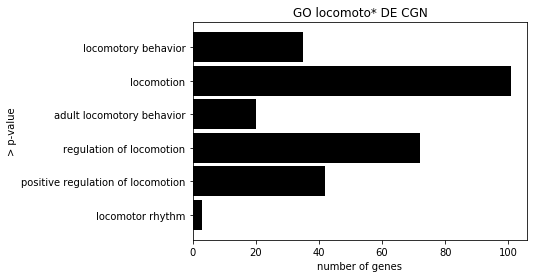

In [112]:
import numpy as np

GO = locomoto.sort_values(by= 'Enrichment', ascending=False, kind='quicksort')
title = 'GO locomoto* DE CGN'

Term = GO.index[:]
y_pos = np.arange(len(Term))
performance = GO.values[:,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_CGN.svg", dpi=300)
plt.show()

In [113]:
import math
GOgenes = locomoto.loc[:,['Gene Symbols']]
x = []
for genes in list(GOgenes.values): 
    for gene in genes:
        if type(gene) is float: continue
        x.extend(gene.split(","))
locosucks = list(set(x))
print(len(locosucks))
locosucks[:5]

165


['Sema4d', 'Arx', 'Pik3cd', 'Nr4a2', 'Plau']

In [114]:
#for each hit in 'Gene Symbol' in GO_CGNP_CGN_loco search in 'Gene_Symbol' of CGNP_CGNplot 
len(CGNplot)

1863

In [115]:
GOhit = []
df =  CGNplot
i = 0
for row in df.iterrows():
    if str(row[0]) in locosucks:
        GOhit.append(df.iloc[i])
    i += 1

GOplot = pd.DataFrame(GOhit)
print(len(GOplot)),
GOplot.head(4)
#GOplot1.head(3).append(GOplot1.tail(3))

165


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Ddit4,0.91931,1.44108,0.63950,0.999963,0.006953,1.99995
Cxcl14,0.82595,1.03235,0.87318,0.910493,0.000036,1.87969
Plau,0.83162,1.02569,0.31213,0.723147,0.027963,1.65078
Mmp12,1.02251,0.85890,0.16270,0.681370,0.031778,1.60367


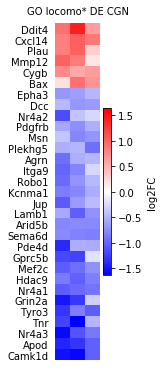

31


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Ddit4,0.91931,1.44108,0.63950,0.999963,0.006953,1.99995
Cxcl14,0.82595,1.03235,0.87318,0.910493,0.000036,1.87969
Plau,0.83162,1.02569,0.31213,0.723147,0.027963,1.65078
Mmp12,1.02251,0.85890,0.16270,0.681370,0.031778,1.60367
Cygb,0.76136,0.56304,0.64215,0.655517,0.040995,1.57518
Tyro3,-1.29566,-0.83024,-1.02789,-1.051263,0.003830,-2.07235
Tnr,-1.21637,-1.64454,-0.48750,-1.116137,0.033121,-2.16766
Nr4a3,-1.59311,-1.10452,-0.86979,-1.189140,0.001878,-2.28017
Apod,-1.40777,-1.29983,-1.02615,-1.244583,0.008859,-2.36951
Camk1d,-1.54081,-1.60009,-1.02207,-1.387657,0.004800,-2.61653


In [116]:
#from matplotlib.mlab import bivariate_normal
import pandas as pd
#Atoh1_15 = pd.read_table('Atoh1CreVsWT-Heatmap_FC+-1,5.txt', index_col=0)#, row_labels=0)

heatmappme = GOplot.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5') #CGNP_CGNplot

column_labels = heatmappme.index#'' #heatmappme.index #CGNP.axes[0]
row_labels = ['','GO locomo* DE CGN',''] #CGNP.axes[1]
data = heatmappme.values[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(1, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')
             # >1.5 or <-1.5 DE CGNP-CGN')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(5).append(heatmappme.tail(5))
#fig.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_CGN-heat.svg", dpi=300)

# GO_Atoh1-loco DE

In [117]:
 #How to filter this for loco* in 'Term'?
GO_Atoh1_loco = GO_Atoh1.drop(NaN).index #here needs to be the filtered output

filtered = []
for term in GO_Atoh1_loco:
#    print(term)
    if "locomo" in term:
        filtered.append(term)
locomoto = pd.DataFrame(GO_Atoh1.drop(NaN)[GO_Atoh1.drop(NaN).index.isin(filtered)])#.query(pvalue)
print(len(locomoto))
#locomoto.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/GO_Atoh1_loco.txt','\t')
locomoto.head(1)

14


,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
negative regulation of locomotion,GO:0040013,0.14,-1.97,262,24,0.014176,1693,23383,"20187,69237,29876,50791,12512,19824,13051,2035...","Ryk,Gtpbp4,Clic4,Magi2,Cd63,Trim10,Cx3cr1,Sema..."


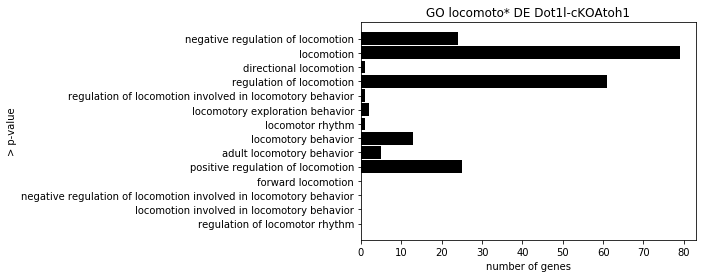

In [118]:
import numpy as np

GO = locomoto.sort_values(by= 'Enrichment', ascending=False, kind='quicksort')
title = 'GO locomoto* DE Dot1l-cKOAtoh1'

Term = GO.index[:]
y_pos = np.arange(len(Term))
performance = GO.values[:,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_Atoh1.svg", dpi=300)
plt.show()

In [119]:
import math
GOgenes = locomoto.loc[:,['Gene Symbols']]
x = []
for genes in list(GOgenes.values): 
    for gene in genes:
        if type(gene) is float: continue
        x.extend(gene.split(","))
locosucks = list(set(x))
print(len(locosucks))
locosucks[:5]

120


['Fn1', 'Amot', 'Ctsb', 'Lrrk2', 'Prr5l']

In [120]:
#for each hit in 'Gene Symbol' in GO_CGNP_CGN_loco search in 'Gene_Symbol' of CGNP_CGNplot 
len(Atoh1plot)

2236

In [121]:
GOhit = []
df =  Atoh1plot
i = 0
for row in df.iterrows():
    if str(row[0]) in locosucks:
        GOhit.append(df.iloc[i])
    i += 1

GOplot = pd.DataFrame(GOhit)
print(len(GOplot))
#GOplot.head(5).append(GOplot.tail(5))

120


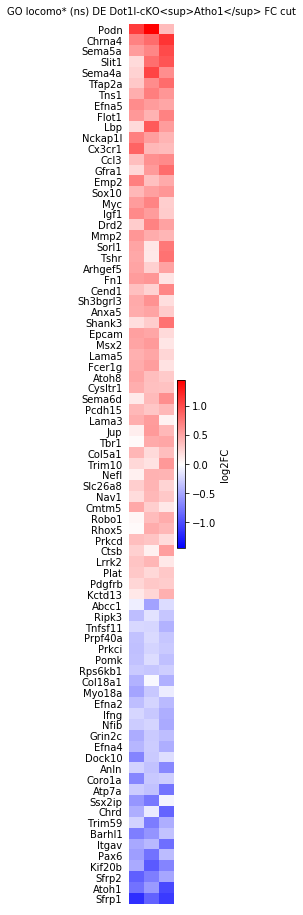

81


In [122]:
#from matplotlib.mlab import bivariate_normal
import pandas as pd
#Atoh1_15 = pd.read_table('Atoh1CreVsWT-Heatmap_FC+-1,5.txt', index_col=0)#, row_labels=0)

heatmappme = GOplot.query('FoldChangeTreatmentVsControl >= 1.2 |  FoldChangeTreatmentVsControl <= -1.2') #CGNP_CGNplot

column_labels = heatmappme.index#'' #heatmappme.index #CGNP.axes[0]
row_labels = ['','GO locomo* (ns) DE Dot1l-cKO<sup>Atho1</sup> FC cut',''] #CGNP.axes[1]
data = heatmappme.values[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(1, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')
             # >1.5 or <-1.5 DE CGNP-CGN')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme[:]#head(7).append(heatmappme.tail(4))
fig.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_locoNS_DE_Atoh1-heat_FC1.2.svg", dpi=300)

# GO cell cycle* DE Dot1l-cKO<sup>Atho1</sup>

In [123]:
 #How to filter this for loco* in 'Term'?
GO_Atoh1_cc = GO_Atoh1.drop(NaN).index #here needs to be the filtered output

filtered = []
for term in GO_Atoh1_cc:
#    print(term)
    if "cell cycle" in term:
        filtered.append(term)
cycle = pd.DataFrame(GO_Atoh1.drop(NaN)[GO_Atoh1.drop(NaN).index.isin(filtered)]).query(pvalue)
print(len(cycle))
cycle.head()

34


,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
cell cycle,GO:0007049,2.020000e-17,-38.4,1015,150,0.088600,1693,23383,"72634,51792,214498,77744,75660,252966,17217,73...","Tdrkh,Ppp2r1a,Cdc73,Bora,Lin37,Cables2,Mcm4,Re..."
mitotic cell cycle,GO:0000278,1.480000e-15,-34.2,524,92,0.054341,1693,23383,"64383,24061,68612,12237,319651,12544,22367,165...","Sirt2,Smc1a,Ube2c,Bub3,Usp37,Cdc45,Vrk1,Kif11,..."
mitotic cell cycle process,GO:1903047,4.930000e-15,-32.9,508,89,0.052569,1693,23383,"15201,74107,100088,76044,78832,76123,219114,10...","Hells,Cep55,Rcc1,Ncapg2,Cacul1,Gpsm2,Ska3,Cdca..."
cell cycle process,GO:0022402,1.610000e-14,-31.8,783,118,0.069699,1693,23383,"20873,15978,68142,56208,217325,327799,21335,38...","Plk4,Ifng,Ino80,Becn1,Llgl2,Usp44,Tacc3,Nsl1,P..."
regulation of cell cycle process,GO:0010564,3.940000e-09,-19.4,474,71,0.041937,1693,23383,"240641,54141,16569,12449,16000,18596,77744,721...","Kif20b,Spag5,Kif3b,Ccnf,Igf1,Pdgfrb,Bora,Tpx2,..."


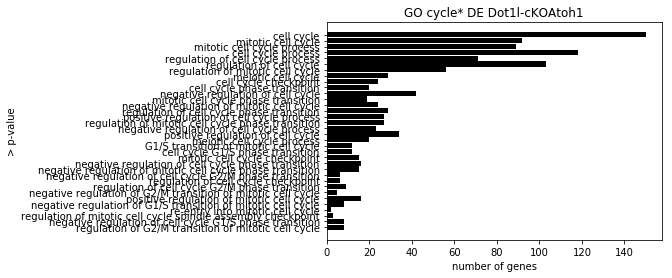

In [124]:
import numpy as np

GO = cycle.sort_values(by= 'Enrichment', ascending=False, kind='quicksort')
title = 'GO cycle* DE Dot1l-cKOAtoh1'

Term = GO.index[:]
y_pos = np.arange(len(Term))
performance = GO.values[:,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(120, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_loco_DE_Atoh1.svg", dpi=300)
plt.show()

In [125]:
import math
GOgenes = cycle.loc[:,['Gene Symbols']]
x = []
for genes in list(GOgenes.values): 
    for gene in genes:
        if type(gene) is float: continue
        x.extend(gene.split(","))
cyclegene = list(set(x))
print(len(locosucks))
cyclegene[:5]

120


['Cdt1', 'L3mbtl1', 'Ncapg', 'Syne4', 'Cdca2']

In [126]:
#for each hit in 'Gene Symbol' in GO_CGNP_CGN_loco search in 'Gene_Symbol' of CGNP_CGNplot 
len(Atoh1plot)

2236

In [127]:
GOhit = []
df =  Atoh1plot
i = 0
for row in df.iterrows():
    if str(row[0]) in cyclegene:
        GOhit.append(df.iloc[i])
    i += 1

GOplot = pd.DataFrame(GOhit)
print(len(GOplot))
#GOplot.head(5).append(GOplot.tail(5))

185


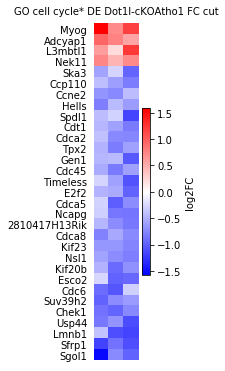

31


,n1,n2,n3,Average,pvalueTreatmentVsControl,FoldChangeTreatmentVsControl
Myog,1.58704,0.72156,1.18450,1.164367,0.006461,2.24135
Adcyap1,0.94685,0.76921,0.56349,0.759850,0.022906,1.69332
L3mbtl1,0.61045,0.22154,1.23307,0.688353,0.044188,1.61145
Nek11,0.74728,0.45943,0.72554,0.644083,0.000766,1.56274
Ska3,-0.57133,-0.26426,-0.95538,-0.596990,0.026134,-1.51255
Ccp110,-0.40716,-0.60640,-0.81148,-0.608347,0.010767,-1.52451
Ccne2,-0.66838,-0.74376,-0.41605,-0.609397,0.039359,-1.52562
Hells,-0.79736,-0.42421,-0.61859,-0.613387,0.001438,-1.52985
Spdl1,-0.41000,-0.27801,-1.15800,-0.615337,0.047816,-1.53191
Cdt1,-0.45344,-0.59270,-0.82112,-0.622420,0.030374,-1.53946


In [128]:
#from matplotlib.mlab import bivariate_normal
import pandas as pd
#Atoh1_15 = pd.read_table('Atoh1CreVsWT-Heatmap_FC+-1,5.txt', index_col=0)#, row_labels=0)

heatmappme = GOplot.query('FoldChangeTreatmentVsControl >= 1.5 |  FoldChangeTreatmentVsControl <= -1.5') #CGNP_CGNplot

column_labels = heatmappme.index#'' #heatmappme.index #CGNP.axes[0]
row_labels = ['','GO cell cycle* DE Dot1l-cKOAtho1 FC cut',''] #CGNP.axes[1]
data = heatmappme.values[:,:3] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/5
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(1, height))
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')
             # >1.5 or <-1.5 DE CGNP-CGN')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme
#fig.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_cell-cycle_DE_Atoh1-FCcut.svg", dpi=300)

# DR_GO_stuff

In [129]:
%matplotlib inline
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.mlab import bivariate_normal
import numpy as np
import scipy
import pylab
import pandas as pd

In [130]:
import os
os.chdir('/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/Homer/')

In [131]:
GO_DR_CGNP_CGN = pd.read_csv('./DR_CGNP-CGN_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_DR_CGNP_CGNneg= pd.read_csv('./DR_-FC_CGNP-CGN_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_DR_CGNP_CGNpos= pd.read_csv('./DR_+FC_CGNP-CGN_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')

GO_DR_CGNP = pd.read_csv('./DR_CGNP_DMSO-DOT1Linh_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_DR_CGNPneg = pd.read_csv('./DR_-FC_CGNP_DMSO-DOT1Linh_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_DR_CGNPpos = pd.read_csv('./DR_+FC_CGNP_DMSO-DOT1Linh_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')

GO_DR_CGN = pd.read_csv('./DR_CGN_DMSO-DOT1Linh_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_DR_CGNneg = pd.read_csv('./DR_-FC_CGN_DMSO-DOT1Linh_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
GO_DR_CGNpos = pd.read_csv('./DR_+FC_CGN_DMSO-DOT1Linh_ses/biological_process.txt', delimiter= '\t', index_col=1).sort_values(by= 'Enrichment', ascending=True, kind='quicksort')

In [132]:
os.chdir('/home/patrick/Syncthing/Work/Galaxy20150915/iPython-Transcriptome-Heatmap/')

In [133]:
pvalue = 'Enrichment <= 0.05'

In [134]:
ls ../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/

 Atoh1CGNC1.svg
 Atoh1_CGN-SAME.svg
 Atoh1creDot1l-IHC_BrdU-Ki76/
 Atoh1CreVsWT-Heatmap_FC+-1,7.svg
 Atoh1p001_log2FC.svg
 Atoh1p0,05_FC1,5_log2FC-3n.svg
 Atoh1p005_FCbig.svg
 Atoh1p005_FC.pdf
 Atoh1p005_FC.svg
 Atoh1p005_log2FC1,5.svg
 Atoh1p0,05_log2FC-3n.svg
 Atoh1p005_log2FC-3n.svg
 Atoh1p005_log2FC.svg
 Atoh-Cre-Cerebellum-Vali.pdf
 CGN_Atoh1p0,05_log2FC-3n.pdf
 CGN_Atoh1p0,05_log2FC-3n.svg
 CGN-heatmap.svg
 CGNp001_log2FC.svg
 CGNp0,05_FC1,5_log2FC-3n.svg
 CGNp005_FCbig.svg
 CGNp005_FC.pdf
 CGNp005_FC.svg
 CGNp005_log2FC1,5.svg
 CGNp0,05_log2FC-3n.svg
 CGNp005_log2FC-3n.svg
 CGNp005_log2FC.svg
 CGNPAtoh1C1.svg
 CGNP_Atoh1p0,05_log2FC-3n.svg
 CGNPAtoh1.svg
 CGNP_CGN_Atoh1p0,05_log2FC-3n_15.svg
 CGNP_CGN_Atoh1p0,05_log2FC-3n.pdf
 CGNP_CGN_Atoh1p0,05_log2FC-3n.svg
 CGNPCGNC1.svg
 CGNP_CGN_p0,05_FC1,5_log2FC-3n.svg
 CGNP_CGNp0,05_FC1,5_log2FC-3n.svg
 CGNP_CGN_p0,05_log2FC-3n.pdf
 CGNP_CGN_p0,05_log2FC-3n.svg
 CGNP_CGNp0,05_log2FC-3n.svg
 CGNP_CGNpp0,05_FC1,5_log2FC-3n.svg
 CGNP_CGNpp

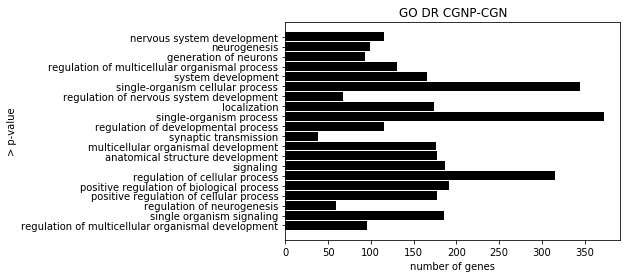

,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
regulation of multicellular organismal development,GO:2000026,6.620282e-17,-37.253809,1741,95,0.185910,511,23383,"16971,71918,13392,18183,210933,20393,20541,751...","Lrp1,Zcchc24,Dlx2,Nrg3,Adgrb3,Sgk1,Slc8a1,Mmd2..."
nervous system development,GO:0007399,2.324287e-24,-54.418629,1922,116,0.227006,511,23383,"18011,103967,93887,11735,68519,13176,20351,212...","Neurl1a,Dnm3,Pcdhb16,Ank3,Eml1,Dcc,Sema4a,Satb..."


In [135]:
import numpy as np

GO = GO_DR_CGNP_CGN[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGNP-CGN'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGNP-CGN-top20.svg")
plt.show()
GO.head(1).append(GO.tail(1))

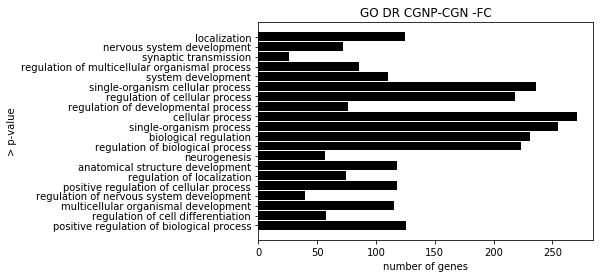

In [136]:
import numpy as np

GO = GO_DR_CGNP_CGNneg[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGNP-CGN -FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGNP-CGN-top20-neg.svg")
#plt.show()
#GO.head(1).append(GO.tail(1))

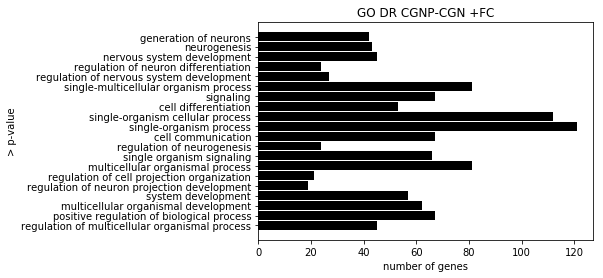

,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
regulation of multicellular organismal process,GO:0051239,5.349510e-10,-21.348846,2601,45,0.294118,153,23383,"21420,20370,75104,329628,50873,18011,19247,103...","Tfap2c,Sez6,Mmd2,Fat4,Park2,Neurl1a,Ptpn11,Dnm..."
generation of neurons,GO:0048699,2.443291e-17,-38.250601,1392,42,0.274510,153,23383,"329628,12386,13842,50873,18011,21420,20370,751...","Fat4,Ctnna2,Epha8,Park2,Neurl1a,Tfap2c,Sez6,Mm..."


In [137]:
import numpy as np

GO = GO_DR_CGNP_CGNpos[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGNP-CGN +FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGNP-CGN-top20-pos.svg", dpi=300)
plt.show()
GO.head(1).append(GO.tail(1))

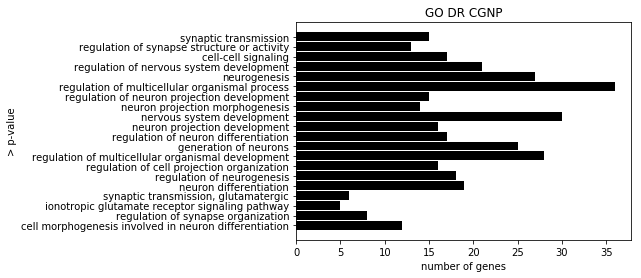

,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
cell morphogenesis involved in neuron differentiation,GO:0048667,1.717705e-07,-15.577107,355,12,0.105263,114,23383,"14183,13508,14432,19699,12386,19274,16728,2056...","Fgfr2,Dscam,Gap43,Reln,Ctnna2,Ptprm,L1cam,Slit..."
synaptic transmission,GO:0007268,1.974387e-11,-24.648178,300,15,0.131579,114,23383,"19894,224997,11540,14803,14804,22421,11539,148...","Rph3a,Dlgap1,Adora2a,Grid1,Grid2,Wnt7a,Adora1,..."


In [138]:
import numpy as np

GO = GO_DR_CGNP[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGNP'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)#
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 10))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGNP-top20.svg", dpi=300)
plt.show()
GO.head(1).append(GO.tail(1))

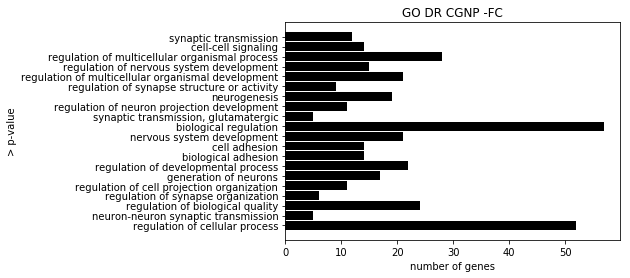

,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
regulation of cellular process,GO:0050794,3.769034e-06,-12.488692,10070,52,0.693333,75,23383,"14803,110637,19894,13641,13131,64075,328949,64...","Grid1,Grik4,Rph3a,Efnb1,Dab1,Smoc1,Mcc,Lpin2,S..."
synaptic transmission,GO:0007268,2.029638e-10,-22.317993,300,12,0.160000,75,23383,"14804,12296,11540,22421,11539,19894,110637,148...","Grid2,Cacnb2,Adora2a,Wnt7a,Adora1,Rph3a,Grik4,..."


In [139]:
import numpy as np

GO = GO_DR_CGNPneg[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGNP -FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)#
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 10))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGNP-top20-neg.svg", dpi=300)
plt.show()
GO.head(1).append(GO.tail(1))

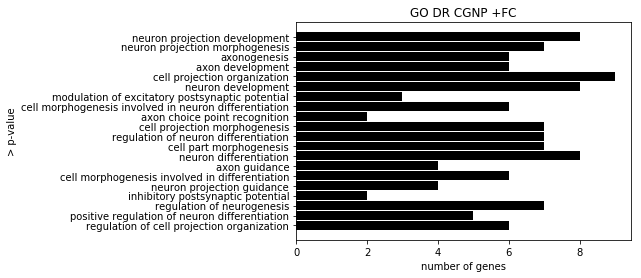

,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
regulation of cell projection organization,GO:0031344,0.000391,-7.846135,571,6,0.15,40,23383,"18223,14432,16728,116838,665113,19699","Numbl,Gap43,L1cam,Rims2,Tnik,Reln"
neuron projection development,GO:0031175,0.000003,-12.703746,539,8,0.20,40,23383,"11820,233552,16728,18223,665113,19699,12386,14432","App,Gdpd5,L1cam,Numbl,Tnik,Reln,Ctnna2,Gap43"


In [140]:
import numpy as np

GO = GO_DR_CGNPpos[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGNP +FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)#
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(20, 10))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGNP-top20-pos.svg", dpi=300)
plt.show()
GO.head(1).append(GO.tail(1))

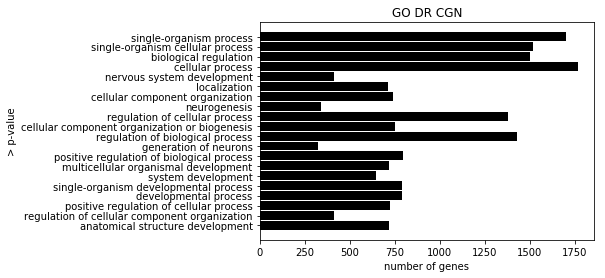

In [141]:
import numpy as np

GO = GO_DR_CGN[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGN'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGN-top20.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

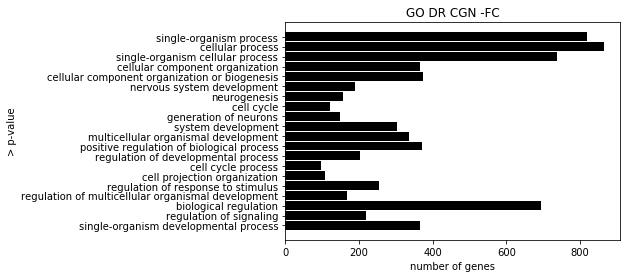

In [142]:
import numpy as np

GO = GO_DR_CGNneg[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGN -FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGN-top20-neg.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

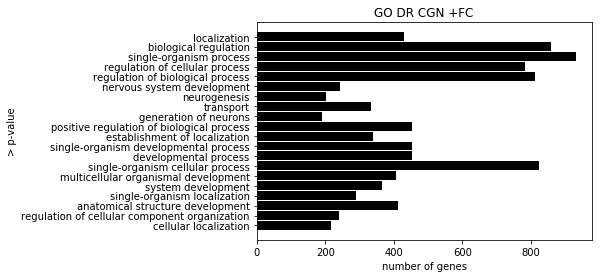

In [143]:
import numpy as np

GO = GO_DR_CGNpos[:20].sort_values(by= 'Enrichment', ascending=False, kind='quicksort').query(pvalue)
title = 'GO DR CGN +FC'

Term = GO.index[:20]
y_pos = np.arange(len(Term))
performance = GO.values[:20,4:5]
error = False #np.random.rand(len(Term))

#barh(bottom, width, height=0.8, left=0, **kwargs)
plt.barh(y_pos, performance, color=['black'], xerr=error, align='center', alpha=1, height=0.9)
plt.yticks(y_pos, Term)
plt.xlabel('number of genes')
plt.title(title)
plt.ylabel('> p-value')
#plt.figure(figsize=(10, 5))

plt.savefig("../../DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/GO_DR_CGN-top20-pos.svg", dpi=300)
plt.show()
#GO.head(1).append(GO.tail(1))

## GO intersect

In [144]:
len(GO_CGNP_CGN), len(GO_CGNP), len(GO_CGN), len(GO_Atoh1), len(GO_DR_CGNP_CGN), len(GO_DR_CGNP), len(GO_DR_CGN)

(14100, 14100, 14100, 14100, 14100, 14100, 14100)

In [145]:
len(GO_CGNP_CGN.query(pvalue)), len(GO_CGNP.query(pvalue)), len(GO_CGN.query(pvalue)), len(GO_Atoh1.query(pvalue)), len(GO_DR_CGNP_CGN.query(pvalue)), len(GO_DR_CGNP.query(pvalue)), len(GO_DR_CGN.query(pvalue))

(2116, 485, 1169, 1006, 1425, 617, 2162)

In [146]:
GO_CGNP_CGN[:1]

,TermID,Enrichment,logP,Genes in Term,Target Genes in Term,Fraction of Targets in Term,Total Target Genes,Total Genes,Entrez Gene IDs,Gene Symbols
Term,,,,,,,,,,
cellular process,GO:0009987,1.820000e-97,-223.0,13781,4900,0.690335,7098,23383,"28019,257939,56458,258803,216344,258362,18606,...","Ing4,Olfr527,Foxo1,Olfr136,Rab21,Olfr1094,Enpp..."


In [147]:
#dfx = pd.DataFrame(gedöns)
df0 = GO_CGNP_CGN.query(pvalue)
df1 = GO_CGNP.query(pvalue)
df2 = GO_CGN.query(pvalue)
df3 = GO_Atoh1.query(pvalue)

df4 = GO_DR_CGNP_CGN.query(pvalue)
df5 = GO_DR_CGNP.query(pvalue)
df6 = GO_DR_CGN.query(pvalue)

frames = [df0, df1, df2, df3, df4, df5, df6]
result = pd.concat(frames)
print(len(result) == len(df0)+len(df1)+len(df2)+len(df3)+len(df4)+len(df5)+len(df6))
len(df0)+len(df1)+len(df2)+len(df3)+len(df4)+len(df5)+len(df6)

True


8980

In [148]:
df01 = table = pd.merge(df0, df1, left_index=True, right_index=True, how='outer', indicator=True, sort=False, suffixes=('_CGNPCGN', 'CGNP'))#.sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
print(len(table)),
table.head(5)#.index#.append(table.tail(2))

2475


,TermID_CGNPCGN,Enrichment_CGNPCGN,logP_CGNPCGN,Genes in Term_CGNPCGN,Target Genes in Term_CGNPCGN,Fraction of Targets in Term_CGNPCGN,Total Target Genes_CGNPCGN,Total Genes_CGNPCGN,Entrez Gene IDs_CGNPCGN,Gene Symbols_CGNPCGN,TermIDCGNP,EnrichmentCGNP,logPCGNP,Genes in TermCGNP,Target Genes in TermCGNP,Fraction of Targets in TermCGNP,Total Target GenesCGNP,Total GenesCGNP,Entrez Gene IDsCGNP,Gene SymbolsCGNP,_merge
Term,,,,,,,,,,,,,,,,,,,,,
'2''-deoxyribonucleotide biosynthetic process',GO:0009265,0.0268,-3.62,9.0,6.0,0.000845,7098.0,23383.0,"11534,110074,14923,21915,22171,20425","Adk,Dut,Guk1,Dtymk,Tyms,Shmt1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
'3''-UTR-mediated mRNA stabilization',GO:0070935,0.0196,-3.93,13.0,8.0,0.001127,7098.0,23383.0,"17164,17874,230908,77134,56190,15568,236732,11...","Mapkapk2,Myd88,Tardbp,Hnrnpa0,Rbm38,Elavl1,Rbm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
'positive regulation of mRNA 3''-end processing',GO:0031442,0.0432,-3.14,17.0,9.0,0.001268,7098.0,23383.0,"234594,213988,208922,67710,239528,433702,18983...","Cnot1,Tnrc6b,Cpeb3,Polr2g,Ago2,Ncbp1,Cnot7,Btg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
'regulation of mRNA 3''-end processing',GO:0031440,0.0158,-4.15,27.0,14.0,0.001972,7098.0,23383.0,"239528,433702,109331,208922,213988,67710,23459...","Ago2,Ncbp1,Rnf20,Cpeb3,Tnrc6b,Polr2g,Cnot1,Rnf...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
'snoRNA 3''-end processing',GO:0031126,0.0303,-3.50,7.0,5.0,0.000704,7098.0,23383.0,"245474,109075,227715,27998,14113","Dkc1,Exosc4,Exosc2,Exosc5,Fbl",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [149]:
df02 = table = pd.merge(df0, df2, left_index=True, right_index=True, how='inner', sort=False, suffixes=('_df0', '_df2'))#.sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
print(len(table)),
table.head(10).index#.append(table.tail(2))

702


Index(['cellular process',
       'cellular component organization or biogenesis',
       'cellular component organization',
       'cellular macromolecule metabolic process',
       'cellular metabolic process',
       'metabolic process',
       'organelle organization',
       'macromolecule metabolic process',
       'organic substance metabolic process',
       'primary metabolic process'],
      dtype='object', name='Term')

In [150]:
df03 = table = pd.merge(df0, df3, left_index=True, right_index=True, how='inner', sort=False, suffixes=('_df0', '_df3'))#.sort_values(by= 'Enrichment', ascending=True, kind='quicksort')
print(len(table)),
table.head(10).index#.append(table.tail(2))

575


Index(['cellular process',
       'cellular component organization or biogenesis',
       'cellular component organization',
       'cellular macromolecule metabolic process',
       'cellular metabolic process',
       'metabolic process',
       'organelle organization',
       'macromolecule metabolic process',
       'organic substance metabolic process',
       'primary metabolic process'],
      dtype='object', name='Term')

# Welche sind DE und DR?!!!

DE_CGNP-CGN_and_DR
http://galaxy.uni-freiburg.de/u/patrick-bovio/v/scatterplot-of-sort-decgnp-cgnanddr

DE_CGNP_DMSO-DOT1Linh_and_DR
http://galaxy.uni-freiburg.de/u/patrick-bovio/v/scatterplot-of-decgnpdmso-dot1linhanddr

DE_CGN_DMSO-DOT1Linh_and_DR
http://galaxy.uni-freiburg.de/u/patrick-bovio/v/scatterplot-of-decgndmso-dot1linhanddr

In [151]:
%matplotlib inline
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.mlab import bivariate_normal
import numpy as np
import scipy
import pylab
import pandas as pd

In [152]:
import os
os.chdir('/home/patrick/Syncthing/Work/Galaxy20150915/All_GO-BiNGO_DAVID-Transcriptom/Homer/')

headername = ['Chr','Start','End','Name','DE_log2FC','Strand','pValue','DR_FC','qValue']

DE_DR_CGNP_CGN = pd.read_csv('./DE-DR_CGNP-CGN.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')
DE_DR_CGNP = pd.read_csv('./DE-DR_CGNP.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')
DE_DR_CGN = pd.read_csv('./DE-DR_CGN.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')

DE_Atoh1_DR_CGNP_CGN = pd.read_csv('./DE_Atoh1-DR_CGNP-CGN.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')
DE_Atoh1_DR_CGNP = pd.read_csv('./DE_Atoh1-DR_CGNP.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')
DE_Atoh1_DR_CGN = pd.read_csv('./DE_Atoh1-DR_CGN.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')

DE_Atoh1_DEDR_CGNP_CGN = pd.read_csv('./DE_Atoh1-DE-DR_CGNP-CGN.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')
DE_Atoh1_DEDR_CGNP = pd.read_csv('./DE_Atoh1-DE-DR_CGNP.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')
DE_Atoh1_DEDR_CGN = pd.read_csv('./DE_Atoh1-DE-DR_CGN.bed', delimiter= '\t',  names=headername).sort_values(by= 'DE_log2FC', ascending=False, kind='quicksort')#.set_index('Name')

os.chdir('/home/patrick/Syncthing/Work/Galaxy20150915/iPython-Transcriptome-Heatmap/')

DEDR = 'Name', 'DE_log2FC'#, 'DR_FC''

print(len(DE_DR_CGNP_CGN))
DE_DR_CGNP_CGN.head(3).append(DE_DR_CGNP_CGN.tail(3))#.values[:,3:4]

347


,Chr,Start,End,Name,DE_log2FC,Strand,pValue,DR_FC,qValue
0,chr12,11325245,11436649,Vsnl1,3.292300,-,0.005200,6.870592,3.268599e-15
1,chr10,63928472,64090277,Lrrtm3,3.183317,-,0.000052,2.152373,2.008087e-04
2,chr4,127986124,128567856,Csmd2,3.129847,+,0.000005,1.269839,9.637169e-02
344,chrY,897788,943811,Kdm5d,-2.050837,+,0.004620,-1.536312,7.649355e-02
345,chr19,45791839,45816061,Kcnip2,-2.485947,-,0.000315,-4.320131,4.171771e-10
346,chr18,67390717,67402749,Tubb6,-3.021743,+,0.000168,-1.811624,1.817417e-02


In [153]:
DE_DR_CGNP_CGN.loc[:,DEDR].set_index('Name').head(3)#.values

,DE_log2FC
Name,
Vsnl1,3.292300
Lrrtm3,3.183317
Csmd2,3.129847


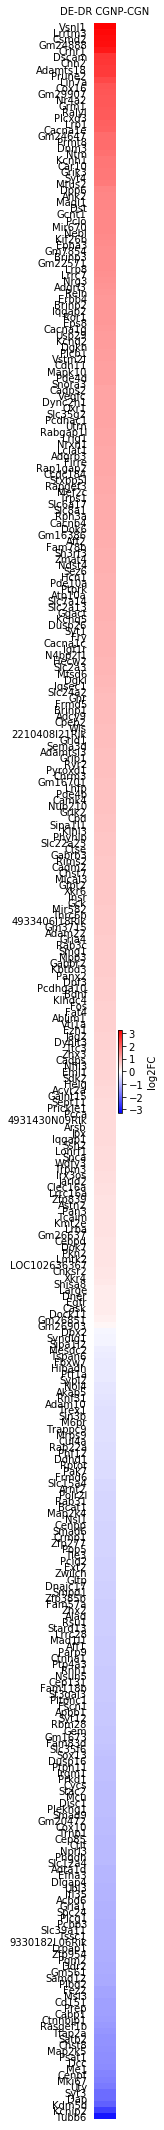

347


,DE_log2FC
Name,
Vsnl1,3.292300
Lrrtm3,3.183317
Csmd2,3.129847
Gm24888,3.107127
Crhr1,2.978213
Dscam,2.619203
Chn2,2.591417
Adamts18,2.538287
Prune2,2.533423


In [154]:
import pandas as pd

heatmappme = DE_DR_CGNP_CGN.loc[:,DEDR].set_index('Name')#.drop(NaN)

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['DE-DR CGNP-CGN'] #CGNP.axes[1]
data = heatmappme.values#[:,4:5] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/9
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(.5, height))
#fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(10).append(heatmappme.tail(10))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_DR_CGNP-CGNplot-name.svg")

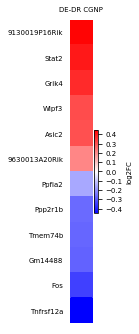

12


,DE_log2FC
Name,
9130019P16Rik,0.441333
Stat2,0.405467
Grik4,0.372290
Gm14488,-0.274213
Fos,-0.335297
Tnfrsf12a,-0.449350


In [155]:
import pandas as pd

heatmappme = DE_DR_CGNP.loc[:,DEDR].set_index('Name')#.drop(NaN)

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['DE-DR CGNP'] #CGNP.axes[1]
data = heatmappme.values#[:,3:4] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])

fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(3).append(heatmappme.tail(3))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_DR_CGNPplot.svg")

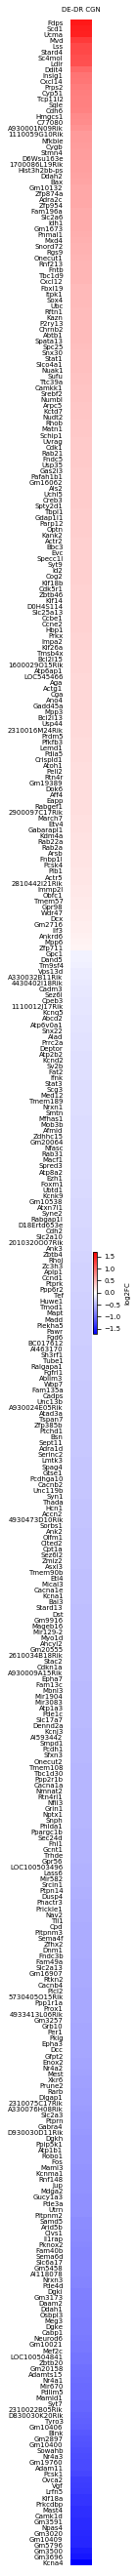

432


,DE_log2FC
Name,
Fdps,1.528000
Scd1,1.491757
Ucma,1.480470
Mvd,1.308950
Lss,1.217143
Stard4,1.209553
Sc4mol,1.173487
Ldlr,1.162290
Ddit4,0.999963


In [156]:
import pandas as pd

heatmappme = DE_DR_CGN.loc[:,DEDR].set_index('Name')#.drop(NaN)

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['DE-DR CGN'] #CGNP.axes[1]
data = heatmappme.values#[:,3:4] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/9
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(.5, height))
#fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(10).append(heatmappme.tail(10))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_DR_CGNplot-name.svg")

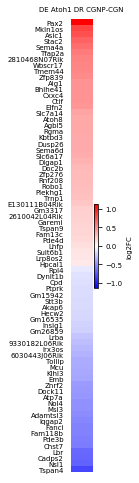

75


,DE_log2FC
Name,
Pax2,1.137800
Mkln1os,0.832323
Asic1,0.781110
Stac2,0.701197
Sema4a,0.644293
Tfap2a,0.591513
2810468N07Rik,0.551230
Wbscr17,0.549407
Tmem44,0.535447


In [157]:
import pandas as pd

heatmappme = DE_Atoh1_DR_CGNP_CGN.loc[:,DEDR].set_index('Name')#.drop(NaN)

column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['DE Atoh1 DR CGNP-CGN'] #CGNP.axes[1]
data = heatmappme.values#[:,3:4] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/9
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(.5, height))
#fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(10).append(heatmappme.tail(10))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_Atoh1-DR_CGNP-CGNplot-name.svg")

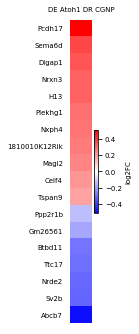

18


,DE_log2FC
Name,
Pcdh17,0.519830
Sema6d,0.377573
Dlgap1,0.346570
Nrxn3,0.324473
H13,0.321210
Plekhg1,0.290093
Nxph4,0.280593
1810010K12Rik,0.268523
Magi2,0.249757


In [158]:
import pandas as pd

heatmappme = DE_Atoh1_DR_CGNP.loc[:,DEDR].set_index('Name')#.drop(NaN)

#column_labels = ''#heatmappme.index #CGNP.axes[0]
column_labels = heatmappme.index #CGNP.axes[0]
row_labels = ['DE Atoh1 DR CGNP'] #CGNP.axes[1]
data = heatmappme.values#[:,3:4] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/9
width= len(row_labels)+1.2

#fig, ax = plt.subplots(figsize=(.5, height))
fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(10).append(heatmappme.tail(10))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_Atoh1-DR_CGNP.svg")

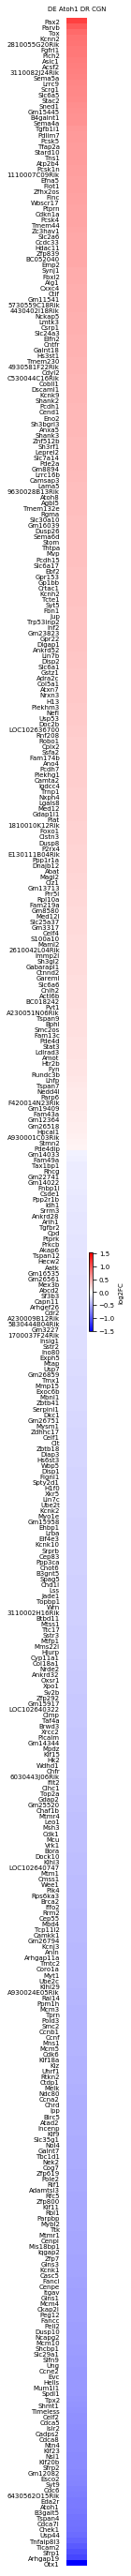

450


,DE_log2FC
Name,
Pax2,1.137800
Parvb,0.976233
Tox,0.882247
Kcnn2,0.833440
2810055G20Rik,0.822153
Fgfrl1,0.804670
Plch2,0.802450
Asic1,0.781110
Acsf2,0.763603


In [159]:
import pandas as pd

heatmappme = DE_Atoh1_DR_CGN.loc[:,DEDR].set_index('Name')#.drop(NaN)

#column_labels = ''#heatmappme.index #CGNP.axes[0]
column_labels = heatmappme.index #CGNP.axes[0]

row_labels = ['DE Atoh1 DR CGN'] #CGNP.axes[1]
data = heatmappme.values#[:,3:4] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/9
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(.5, height))
#fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(10).append(heatmappme.tail(10))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_Atoh1-DR_CGNplot-names.svg")

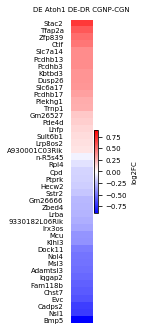

43


,DE_log2FC
Name,
Stac2,0.701197
Tfap2a,0.591513
Zfp839,0.518523
Ctif,0.482280
Slc7a14,0.408660
Pcdhb13,0.406303
Pcdhb3,0.402223
Kbtbd3,0.380153
Dusp26,0.378050


In [160]:
import pandas as pd

heatmappme = DE_Atoh1_DEDR_CGNP_CGN.loc[:,DEDR].set_index('Name')#.drop(NaN)

column_labels = ''#heatmappme.index #CGNP.axes[0]
column_labels = heatmappme.index #CGNP.axes[0]

row_labels = ['DE Atoh1 DE-DR CGNP-CGN'] #CGNP.axes[1]
data = heatmappme.values#[:,3:4] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/9
width= len(row_labels)+1.2

#fig, ax = plt.subplots(figsize=(.5, height))
fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(10).append(heatmappme.tail(10))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_Atoh1-DEDR_CGNP-CGN-names.svg")

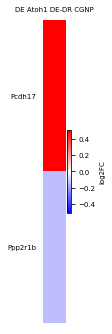

2


,DE_log2FC
Name,
Pcdh17,0.519830
Ppp2r1b,-0.133107
Pcdh17,0.519830
Ppp2r1b,-0.133107


In [161]:
import pandas as pd

heatmappme = DE_Atoh1_DEDR_CGNP.loc[:,DEDR].set_index('Name')#.drop(NaN)

#column_labels = ''#heatmappme.index #CGNP.axes[0]
column_labels = heatmappme.index #CGNP.axes[0]

row_labels = ['DE Atoh1 DE-DR CGNP'] #CGNP.axes[1]
data = heatmappme.values#[:,3:4] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/9
width= len(row_labels)+1.2

#fig, ax = plt.subplots(figsize=(.5, height))
fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(3).append(heatmappme.tail(3))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_Atoh1-DEDR_CGNPplot.svg")

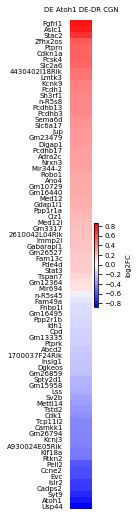

81


,DE_log2FC
Name,
Fgfrl1,0.804670
Asic1,0.781110
Stac2,0.701197
Syt9,-0.737317
Atoh1,-0.792533
Usp44,-0.871257


In [162]:
import pandas as pd

heatmappme = DE_Atoh1_DEDR_CGN.loc[:,DEDR].set_index('Name')#.drop(NaN)

#column_labels = ''#heatmappme.index #CGNP.axes[0]
column_labels = heatmappme.index #CGNP.axes[0]

row_labels = ['DE Atoh1 DE-DR CGN'] #CGNP.axes[1]
data = heatmappme.values#[:,3:4] #square(heatmappme.values) for FC instead of log2FC

maxval = max([abs(data.min()), data.max()])
height= len(column_labels)/9
width= len(row_labels)+1.2

fig, ax = plt.subplots(figsize=(.5, height))
#fig, ax = plt.subplots(figsize=(.5, 5.586))#inch
#fig.tight_layout(pad=1)
heatmap = ax.pcolormesh(data, vmin=-maxval, vmax=maxval, cmap=plt.cm.bwr, alpha=1)
fig.colorbar(heatmap, ax=ax, label='log2FC')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

font = {#'family' : 'normal',
#        'weight' : 'bold',
        'size'   : 7}
matplotlib.rc('font', **font)

plt.show()
print(len(heatmappme))
heatmappme.head(3).append(heatmappme.tail(3))
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/Corected/plotHeatmap_DE_Atoh1-DEDR_CGNplot-names.svg")

import collections
infile = "Galaxy160-[Sort_on_data_140].interval"
symbols = collections.OrderedDict()

## read file into dictionary
with open(infile, "r") as f:
    for line in f.readlines():
        line = line.strip()
        c = line.split("\t")
        s = c[3]
        if s not in symbols:
            symbols[s] = [c]
        else:
            symbols[s].append(c)

for k,v in symbols.iteritems():
    c = v[0]

    total_length_of_peaks = sum(map(lambda x: int(x[14])-int(x[13]), v))

    FC = map(lambda x: float(x[16]), v)
    if sum(FC) >= 0:
        most_extrem_FC = max(FC)
    else:
        most_extrem_FC = min(FC)

    min_qval = min(map(lambda x: float(x[18]), v))

    print("\t".join( c[:7] + [str(total_length_of_peaks), str(most_extrem_FC), str(min_qval)]))

In [163]:
#intersections:

print(len(DE_DR_CGNP_CGN),
len(DE_DR_CGNP),
len(DE_DR_CGN),
##DE_Atoh1_DR_CGNP_CGN
##DE_Atoh1_DR_CGNP
##DE_Atoh1_DR_CGN
len(DE_Atoh1_DEDR_CGNP_CGN),
len(DE_Atoh1_DEDR_CGNP),
len(DE_Atoh1_DEDR_CGN))

347 12 432 43 2 81


In [164]:
#dfx = pd.DataFrame(gedöns)
df0 = DE_DR_CGNP_CGN.set_index('Name')
df1 = DE_DR_CGNP.set_index('Name')
df2 = DE_DR_CGN.set_index('Name')
df3 = DE_Atoh1_DEDR_CGNP_CGN.set_index('Name')
df4 = DE_Atoh1_DEDR_CGNP.set_index('Name')
df5 = DE_Atoh1_DEDR_CGN.set_index('Name')

frames = [df0, df1, df2, df3, df4, df5]
result = pd.concat(frames)
print(len(result) == len(df0)+len(df1)+len(df2)+len(df3)+len(df4)+len(df5))
len(df0)+len(df1)+len(df2)+len(df3)+len(df4)+len(df5)

True


917

In [165]:
DEDR_CGNPCGN_CGNP = df01 = table = pd.merge(df0, df1, left_index=True, right_index=True, how='inner', suffixes=('_df0', '_df1')).sort_values(by= 'DE_log2FC_df0', ascending=False, kind='quicksort')
print(len(table)),
table#.head(3).append(table.tail(3))

1


,Chr_df0,Start_df0,End_df0,DE_log2FC_df0,Strand_df0,pValue_df0,DR_FC_df0,qValue_df0,Chr_df1,Start_df1,End_df1,DE_log2FC_df1,Strand_df1,pValue_df1,DR_FC_df1,qValue_df1
Name,,,,,,,,,,,,,,,,
Fos,chr12,85473890,85477273,0.609167,+,0.014004,-1.849169,0.000155,chr12,85473890,85477273,-0.335297,+,0.005425,1.913241,0.000026


In [166]:
DEDR_CGNPCGN_CGN = df02 = table = pd.merge(df0, df2, left_index=True, right_index=True, how='inner', suffixes=('_df0', '_df2')).sort_values(by= 'DE_log2FC_df0', ascending=False, kind='quicksort')
print(len(table)),
table#.index#.head(10).append(table.tail(10))

50


,Chr_df0,Start_df0,End_df0,DE_log2FC_df0,Strand_df0,pValue_df0,DR_FC_df0,qValue_df0,Chr_df2,Start_df2,End_df2,DE_log2FC_df2,Strand_df2,pValue_df2,DR_FC_df2,qValue_df2
Name,,,,,,,,,,,,,,,,
Prune2,chr19,16956118,17223932,2.533423,+,0.000227,-2.724539,2.957108e-04,chr19,16956118,17223932,-0.631263,+,0.000607,1.231420,2.086475e-02
Nr4a2,chr2,57106830,57124003,2.158497,-,0.000259,-2.328456,3.111914e-03,chr2,57106830,57124003,-0.603143,-,0.042648,3.932603,1.682884e-12
Cacna1e,chr1,154392519,154725920,2.030500,-,0.000652,-1.715425,3.392994e-02,chr1,154392519,154725920,-0.419783,-,0.002397,3.593977,1.002269e-07
Ank2,chr3,126921607,127499349,1.564843,-,0.000343,-3.119025,7.398451e-04,chr3,126921607,127499349,-0.398867,-,0.005667,2.043975,1.709324e-04
Dst,chr1,33908280,34308652,1.548303,+,0.000791,-1.423452,2.886820e-02,chr1,33908280,34308652,-0.428023,+,0.002033,1.418105,3.358947e-04
Gcnt1,chr19,17326141,17372844,1.541130,-,0.011285,-6.375665,5.852051e-18,chr19,17326141,17372844,-0.502013,-,0.034525,4.888984,2.295297e-14
Mir670,chr2,94251878,94264758,1.525553,-,0.018025,-5.323765,3.700289e-14,chr2,94251878,94264758,-0.980927,-,0.009057,11.447891,1.232530e-62
Epha3,chr16,63543538,63864158,1.476970,-,0.000151,-2.847676,5.313952e-04,chr16,63543538,63864158,-0.590210,-,0.020003,2.622262,3.013754e-04
Kcnd2,chr6,21215503,21729805,1.268100,+,0.000071,-2.311091,4.086901e-04,chr6,21215503,21729805,-0.199833,+,0.021559,2.192917,2.597691e-04


In [167]:
DEDR_CGNP_CGN = df12 = table = pd.merge(df1, df2, left_index=True, right_index=True, how='inner', suffixes=('_df1', '_df2')).sort_values(by= 'DE_log2FC_df1', ascending=False, kind='quicksort')
print(len(table)),
table#.head(3).append(table.tail(3))

2


,Chr_df1,Start_df1,End_df1,DE_log2FC_df1,Strand_df1,pValue_df1,DR_FC_df1,qValue_df1,Chr_df2,Start_df2,End_df2,DE_log2FC_df2,Strand_df2,pValue_df2,DR_FC_df2,qValue_df2
Name,,,,,,,,,,,,,,,,
Ppp2r1b,chr9,50845301,50894229,-0.262130,+,0.021752,1.128969,0.054781,chr9,50845301,50894229,-0.479047,+,0.028060,1.089486,5.784836e-03
Fos,chr12,85473890,85477273,-0.335297,+,0.005425,1.913241,0.000026,chr12,85473890,85477273,-0.700500,+,0.000281,6.988886,1.666271e-09


In [168]:
middle = df012 =table = pd.merge(df01, df2, left_index=True, right_index=True, how='inner', suffixes=('_df01', '_df2'))#.sort_values(by= 'DE_log2FC_df01', ascending=False, kind='quicksort')
print(len(table)),
table#.head(3).append(table.tail(3))

1


,Chr_df0,Start_df0,End_df0,DE_log2FC_df0,Strand_df0,pValue_df0,DR_FC_df0,qValue_df0,Chr_df1,Start_df1,End_df1,DE_log2FC_df1,Strand_df1,pValue_df1,DR_FC_df1,qValue_df1,Chr,Start,End,DE_log2FC,Strand,pValue,DR_FC,qValue
Name,,,,,,,,,,,,,,,,,,,,,,,,
Fos,chr12,85473890,85477273,0.609167,+,0.014004,-1.849169,0.000155,chr12,85473890,85477273,-0.335297,+,0.005425,1.913241,0.000026,chr12,85473890,85477273,-0.7005,+,0.000281,6.988886,1.666271e-09


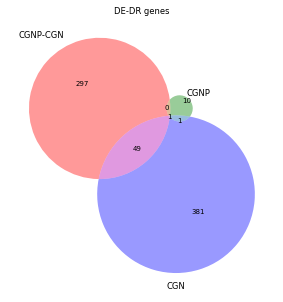

In [169]:
#VENN in vivo
#### from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

fig = plt.figure(figsize=(5,5))
v = venn3(subsets=(len(df0)-len(df01)-len(df02)+len(df012), 
                   len(df1)-len(df01)-len(df12)+len(df012), 
                   len(df01)-len(df012), 
                   len(df2)-len(df12)-len(df02)+len(df012), 
                   len(df02)-len(df012), 
                   len(df12)-len(df012), 
                   len(df012), 
                   ), 
          set_labels = ('CGNP-CGN', 'CGNP', 'CGN'))
plt.title("DE-DR genes")
plt.show()
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/VENN_DE-DR.svg", dpi=60)

In [170]:
DE_Atoh1_DEDR_CGNPCGN_CGNP = df34 = table = pd.merge(df3, df4, left_index=True, right_index=True, how='inner', suffixes=('_df3', '_df4')).sort_values(by= 'DE_log2FC_df3', ascending=False, kind='quicksort')
print(len(table)),
table#.head(3).append(table.tail(3))

0


,Chr_df3,Start_df3,End_df3,DE_log2FC_df3,Strand_df3,pValue_df3,DR_FC_df3,qValue_df3,Chr_df4,Start_df4,End_df4,DE_log2FC_df4,Strand_df4,pValue_df4,DR_FC_df4,qValue_df4
Name,,,,,,,,,,,,,,,,


In [171]:
DE_Atoh1_DEDR_CGNPCGN_CGN = df35 = table = pd.merge(df3, df5, left_index=True, right_index=True, how='inner', suffixes=('_df3', '_df5')).sort_values(by= 'DE_log2FC_df3', ascending=False, kind='quicksort')
print(len(table)),
table#.head(3).append(table.tail(3))
#table.to_csv('../All_GO-BiNGO_DAVID-Transcriptom/Homer/DE_Atoh1_DEDR_CGNPCGN_CGN.txt','\t')

12


,Chr_df3,Start_df3,End_df3,DE_log2FC_df3,Strand_df3,pValue_df3,DR_FC_df3,qValue_df3,Chr_df5,Start_df5,End_df5,DE_log2FC_df5,Strand_df5,pValue_df5,DR_FC_df5,qValue_df5
Name,,,,,,,,,,,,,,,,
Stac2,chr11,98036623,98053462,0.701197,-,0.019365,-0.830007,0.010236,chr11,98036623,98053462,0.701197,-,0.019365,-0.442647,0.009761
Pcdhb13,chr18,37442517,37446209,0.406303,+,0.000547,1.164290,0.005013,chr18,37442517,37446209,0.406303,+,0.000547,-0.376297,0.021986
Pcdhb3,chr18,37300799,37304585,0.402223,+,0.029417,1.164290,0.005013,chr18,37300799,37304585,0.402223,+,0.029417,-0.376297,0.021986
Slc6a17,chr3,107467543,107518018,0.368920,-,0.003320,1.074580,0.013214,chr3,107467543,107518018,0.368920,-,0.003320,-0.799477,0.002160
Pcdhb17,chr18,37485021,37488290,0.332780,+,0.030958,1.164290,0.005013,chr18,37485021,37488290,0.332780,+,0.030958,-0.376297,0.021986
Gm26527,chr13,93940990,93943015,0.193893,-,0.013750,0.470470,0.008201,chr13,93940990,93943015,0.193893,-,0.013750,0.185430,0.049184
Pde4d,chr13,108449948,109955969,0.172480,+,0.020852,0.685637,0.011446,chr13,108449948,109955969,0.172480,+,0.020852,-0.452563,0.013253
n-R5s45,chr14,12427532,12427641,-0.048340,-,0.025825,0.562433,0.011959,chr14,12427532,12427641,-0.048340,-,0.025825,-0.354767,0.010175
Cpd,chr11,76777208,76847018,-0.150670,-,0.018833,0.761560,0.005022,chr11,76777208,76847018,-0.150670,-,0.018833,-0.547060,0.035377


In [172]:
DE_Atoh1_DEDR_CGNP_AD_CGN = df45 = table = pd.merge(df4, df5, left_index=True, right_index=True, how='inner', suffixes=('_df4', '_df5')).sort_values(by= 'DE_log2FC_df4', ascending=False, kind='quicksort')
print(len(table)),
table#.head(3).append(table.tail(3))

1


,Chr_df4,Start_df4,End_df4,DE_log2FC_df4,Strand_df4,pValue_df4,DR_FC_df4,qValue_df4,Chr_df5,Start_df5,End_df5,DE_log2FC_df5,Strand_df5,pValue_df5,DR_FC_df5,qValue_df5
Name,,,,,,,,,,,,,,,,
Ppp2r1b,chr9,50845301,50894229,-0.133107,+,0.018534,-0.26213,0.021752,chr9,50845301,50894229,-0.133107,+,0.018534,-0.479047,0.02806


In [173]:
DE_Atoh1_DEDR_CGNP_AD_CGN = df345 = table = pd.merge(df34, df5, left_index=True, right_index=True, how='inner', suffixes=('_df34', '_df5'))#.sort_values(by= 'DE_log2FC_df34', ascending=False, kind='quicksort')
print(len(table)),
table#.head(3).append(table.tail(3))

0


,Chr_df3,Start_df3,End_df3,DE_log2FC_df3,Strand_df3,pValue_df3,DR_FC_df3,qValue_df3,Chr_df4,Start_df4,End_df4,DE_log2FC_df4,Strand_df4,pValue_df4,DR_FC_df4,qValue_df4,Chr,Start,End,DE_log2FC,Strand,pValue,DR_FC,qValue
Name,,,,,,,,,,,,,,,,,,,,,,,,


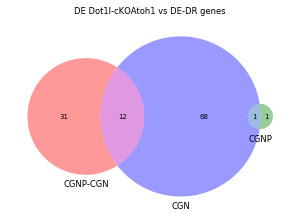

In [174]:
#VENN in vivo
#### from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

fig = plt.figure(figsize=(5,5))
v = venn3(subsets=(len(df3)-len(df34)-len(df35)+len(df345), 
                   len(df4)-len(df34)-len(df45)+len(df345), 
                   len(df34)-len(df345),
                   len(df5)-len(df45)-len(df35)+len(df345), 
                   len(df35)-len(df345), 
                   len(df45),-len(df345), 
                   len(df345), 
                   ), 
          set_labels = ('CGNP-CGN', 'CGNP', 'CGN'))
plt.title("DE Dot1l-cKOAtoh1 vs DE-DR genes")
plt.show()
#fig.savefig("/home/patrick/Syncthing/Work/DrArbeit/DOT1LPaper+DrArbCGN-CGNP/imagesDr/RAW/VENN_DE-Atoh_DE-DR.svg", dpi=60)